# This is the case study in China, methods are the same as for USA. 
# The way we process the data is the same, except that in the data of China, there are some missing features compared to it of USA.
# In genral, it won't influence the models a lot. Skip to the last several pages for the results.

In [308]:
# Here we will use these features to combine our dataset
# It is based the background knowledge 
# The description of the data is in the attached file

In [ ]:
# TARGET QUESTIONS 
'Q121','Q122','Q123', 'Q124', 'Q125', 'Q126', 'Q127', 'Q128', 'Q129', 'Q130'

In [ ]:
# PERSONAL DATA
'Q260', 'Q262', 'Q263','Q264', 'Q265', 'Q269', 'Q270', 'Q271', 
'Q273', 'Q274', 'Q275','Q279', 'Q290'

In [ ]:
# TRUST
'Q21','Q57','Q59', 'Q61', 'Q62', 'Q63'

In [ ]:
# SECURE
'Q131','Q132','Q133','Q134','Q135','Q136','Q137','Q138','Q142'

In [ ]:
# REIGION
'Q6','Q164','Q171','Q172','Q173','Q289'

In [ ]:
# MORALITY
'Q176', 'Q177','Q178', 'Q179', 'Q180', 'Q181', 'Q182', 'Q183', 'Q184',
'Q185', 'Q186','Q187', 'Q188', 'Q189', 'Q190', 'Q191', 'Q192', 'Q193', 
'Q194', 'Q195'

In [ ]:
# POLITICS
'Q199', 'Q200', 'Q209', 'Q210', 'Q211', 'Q212', 'Q213', 'Q214', 'Q215',
'Q216', 'Q217', 'Q218', 'Q219', 'Q220',

In [ ]:
# ECONOMICS
'Q5','Q50','Q109','Q110','Q142','Q287','Q288'

In [ ]:
# HAPPY
'Q46', 'Q47', 'Q49'

In [1]:
# Import necessay libraries 
import pandas as pd
import numpy as np
import random as rnd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv('WVS7.csv',low_memory=False)

In [3]:
# Now we focus on situation in China
df_cn = df[(df['B_COUNTRY_ALPHA'] == "CHN") ]

<AxesSubplot: >

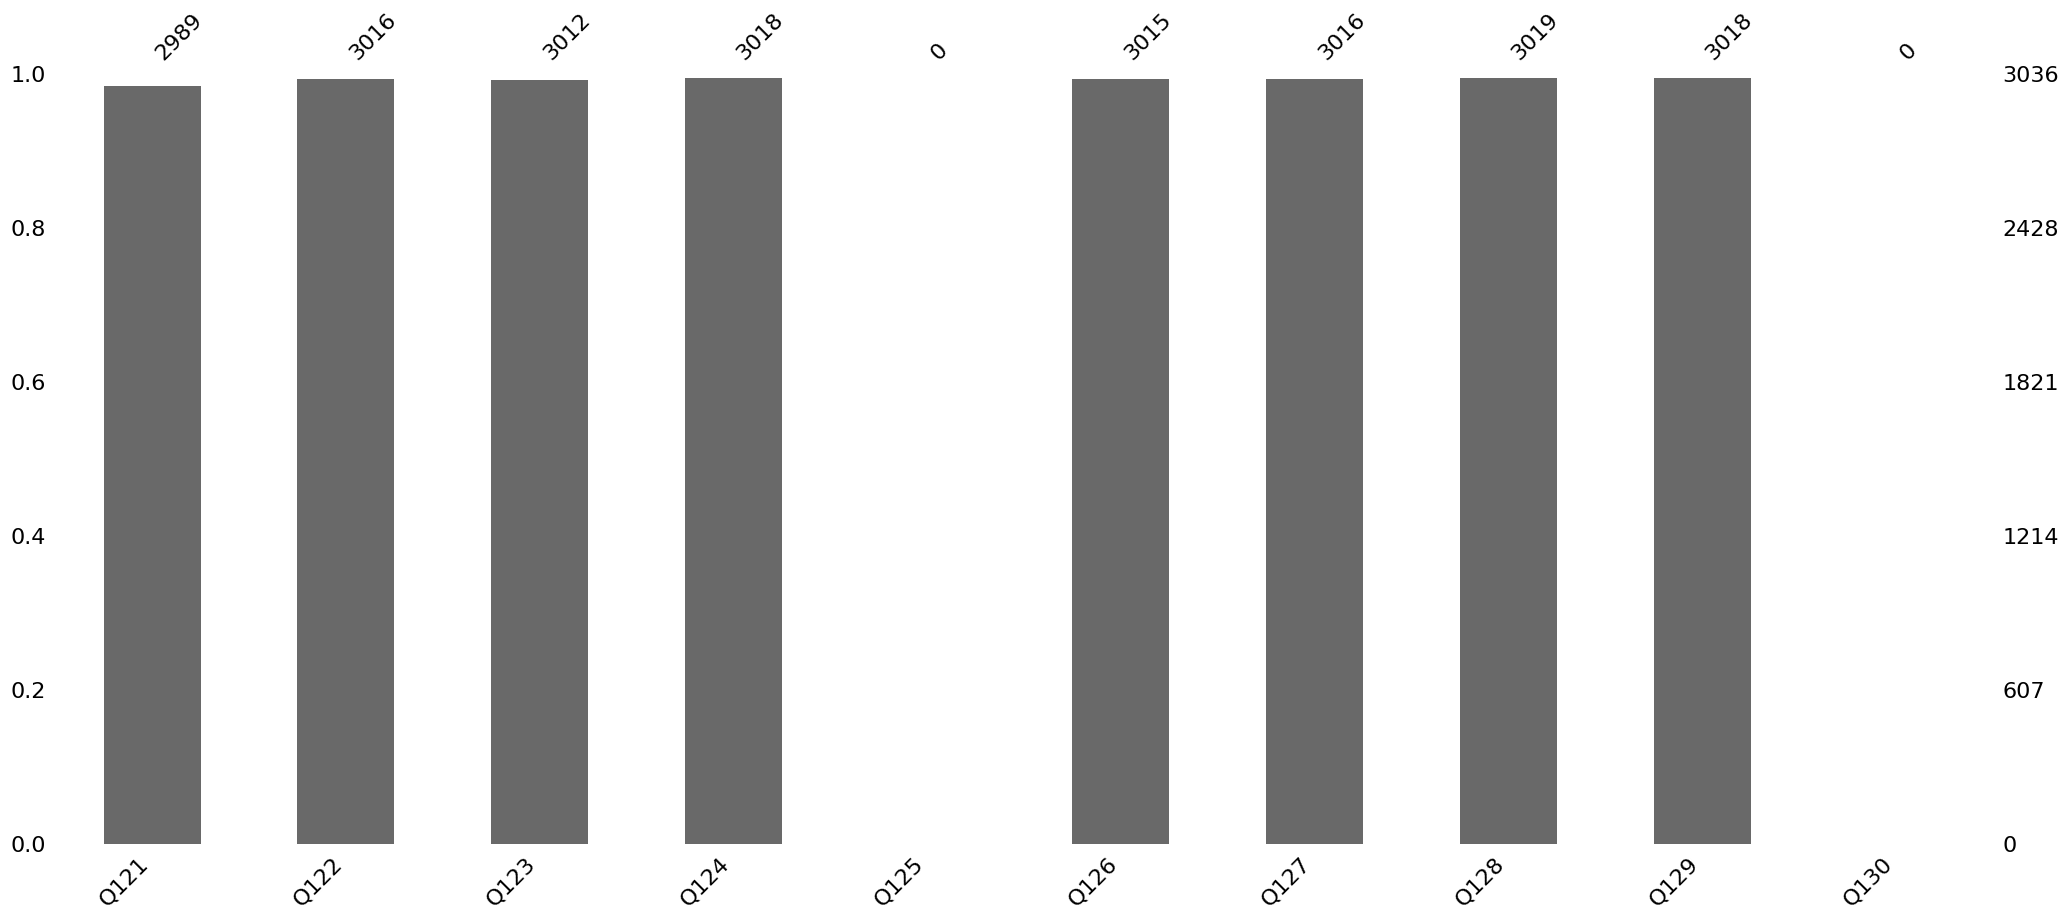

In [4]:
# Preapare dataframe for target questions
df_cn_target = df_cn.loc[:,['Q121','Q122','Q123', 'Q124', 'Q125', 'Q126', 'Q127', 'Q128', 'Q129', 'Q130']]
# Visualize the missing values in each column
msno.bar(df_cn_target)

In [5]:
#Calculate how many missing values in each column
df_cn_target.isnull().sum()

Q121      47
Q122      20
Q123      24
Q124      18
Q125    3036
Q126      21
Q127      20
Q128      17
Q129      18
Q130    3036
dtype: int64

In [6]:
# We drop the empty columns
df_cn_target = df_cn_target.drop(['Q125','Q130'],axis=1)

In [7]:
# Check sub dataset
df_cn_target.describe()

,Q121,Q122,Q123,Q124,Q126,Q127,Q128,Q129
count,2989.000000,3016.000000,3012.000000,3018.000000,3015.000000,3016.000000,3019.000000,3018.000000
mean,3.524925,1.404178,1.607238,0.943671,0.686899,1.467175,0.906923,0.706428
std,0.801060,0.723523,0.662704,0.817935,0.755961,0.721329,0.841053,0.789787
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,4.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,0.000000
75%,4.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000
max,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [8]:
# We divided questions with different emotions, 3 can be positive ones, 4 can be negative ones
Posfeatures = ['Q122', 'Q123', 'Q127']
Negfeatures = ['Q124', 'Q126', 'Q128', 'Q129']
# Set the condition, if people have more positive attitudes towards immigration, then the 
# attitude is positive as 1, else neagative as 0
for i, row in df_cn_target.iterrows():    
    sum_Posfeatures = row[Posfeatures].sum()
    sum_Negfeatures = row[Negfeatures].sum()
    df_cn_target.loc[i, "Attitude"] = 1 if sum_Posfeatures > sum_Negfeatures else 0


In [9]:
# Drop redundant columns and rename another tagert column 
df_cn_target = df_cn_target.drop(['Q122', 'Q123', 'Q127','Q124', 'Q126','Q128', 'Q129'],axis=1)
df_cn_target = df_cn_target.rename(columns={'Q121': 'Impact_level'})
# Show the targets 
df_cn_target


,Impact_level,Attitude
1658,3.0,0.0
1659,5.0,1.0
1660,4.0,0.0
1661,5.0,0.0
1662,3.0,0.0
...,...,...
4689,3.0,1.0
4690,4.0,1.0
4691,4.0,0.0
4692,4.0,0.0


In [10]:
df_cn_target.describe()

,Impact_level,Attitude
count,2989.000000,3036.000000
mean,3.524925,0.595520
std,0.801060,0.490872
min,1.000000,0.000000
25%,3.000000,0.000000
50%,4.000000,1.000000
75%,4.000000,1.000000
max,5.000000,1.000000


In [11]:
df_cn_target['Attitude'].value_counts()

1.0    1808
0.0    1228
Name: Attitude, dtype: int64

In [12]:
1228/1808

0.6792035398230089

In [ ]:
# Here we can see the data for classification is a little bit Imbalanced but not too much

<AxesSubplot: >

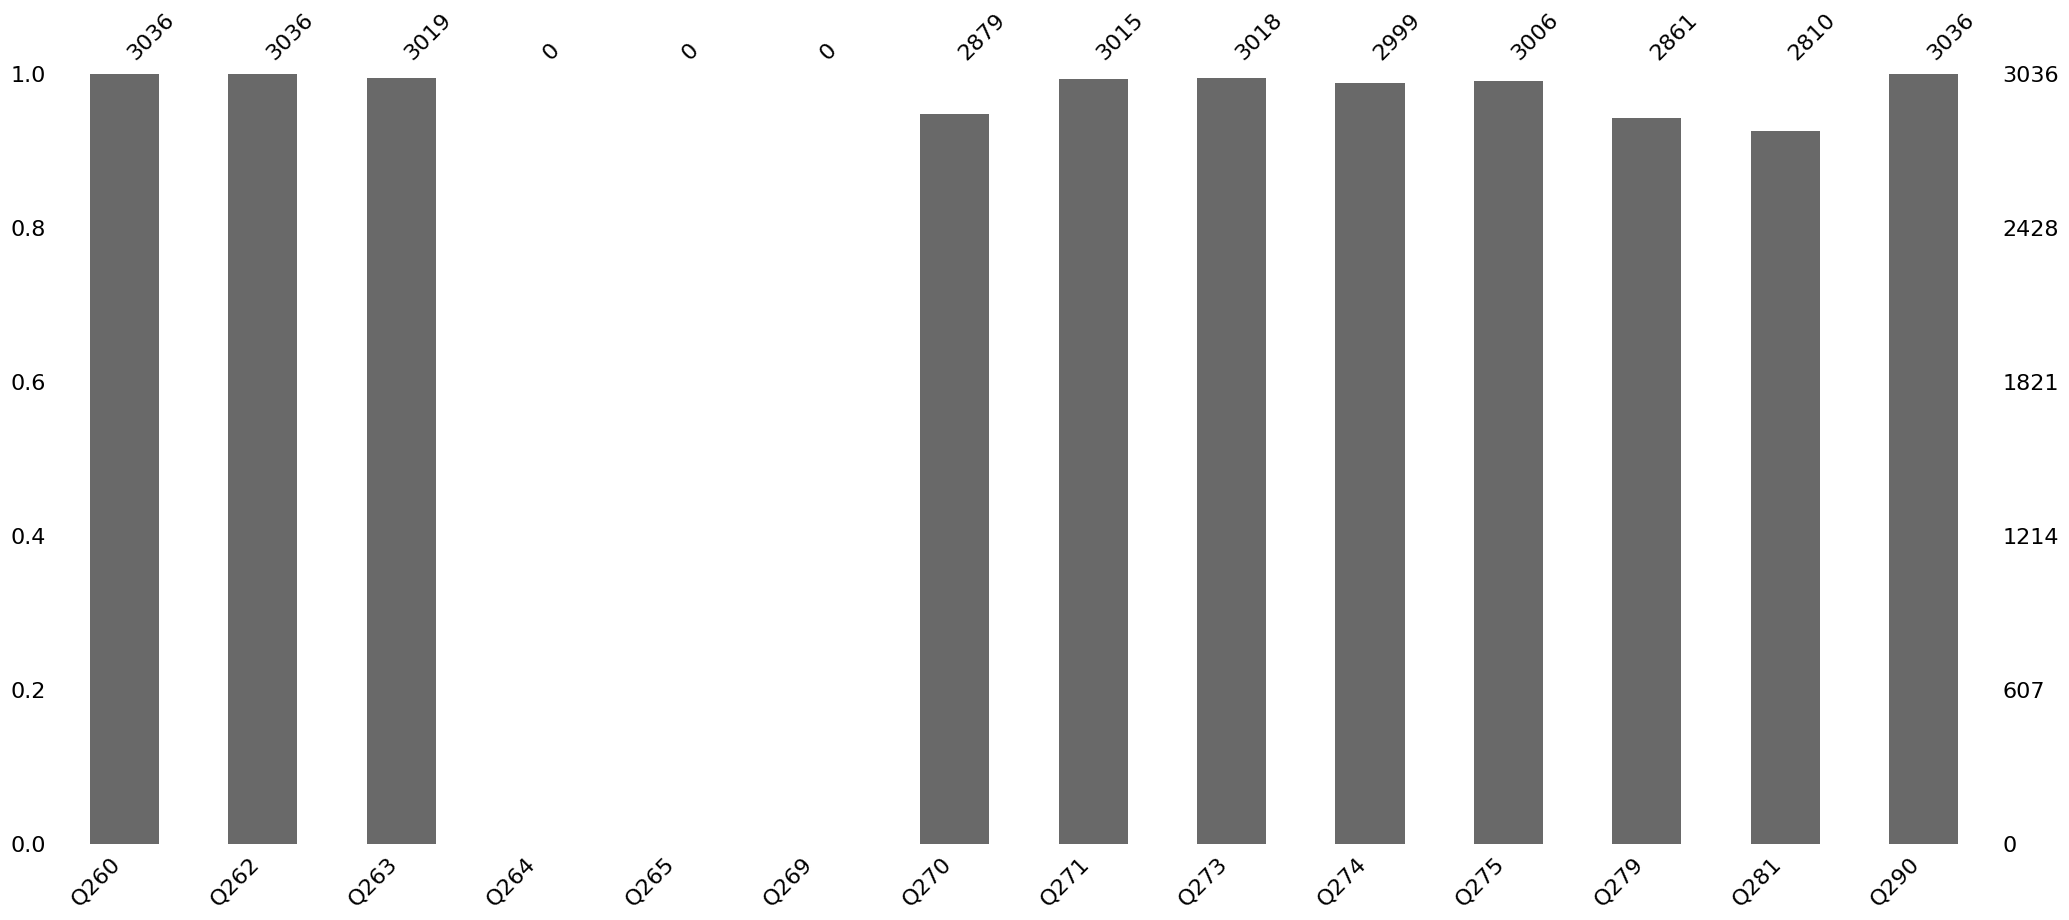

In [13]:
# Preapare dataframe for personal statistics
df_cn_personal = df_cn.loc[:,['Q260', 'Q262', 'Q263','Q264', 'Q265', 'Q269', 'Q270', 
                              'Q271', 'Q273', 'Q274', 'Q275','Q279', 'Q281','Q290']]
# Visualize the missing values in each column
msno.bar(df_cn_personal)

In [14]:
#Calculate how many missing values in each column
df_cn_personal.isnull().sum()

Q260       0
Q262       0
Q263      17
Q264    3036
Q265    3036
Q269    3036
Q270     157
Q271      21
Q273      18
Q274      37
Q275      30
Q279     175
Q281     226
Q290       0
dtype: int64

In [15]:
df_cn_personal.describe()

,Q260,Q262,Q263,Q264,Q265,Q269,Q270,Q271,Q273,Q274,Q275,Q279,Q281,Q290
count,3036.000000,3036.00000,3019.0,0.0,0.0,0.0,2879.000000,3015.000000,3018.000000,2999.000000,3006.000000,2861.000000,2810.000000,3036.0
mean,1.549078,44.58498,1.0,NaN,NaN,NaN,3.489059,1.400995,1.861829,1.402134,2.834331,2.775253,4.259075,156001.0
std,0.497668,14.49914,0.0,NaN,NaN,NaN,1.502997,0.685957,1.802420,0.912267,1.908863,2.096324,3.090966,0.0
min,1.000000,18.00000,1.0,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,156001.0
25%,1.000000,33.00000,1.0,NaN,NaN,NaN,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,156001.0
50%,2.000000,45.00000,1.0,NaN,NaN,NaN,3.000000,1.000000,1.000000,1.000000,2.000000,2.000000,4.000000,156001.0
75%,2.000000,56.00000,1.0,NaN,NaN,NaN,4.000000,2.000000,1.000000,2.000000,3.000000,4.000000,7.000000,156001.0
max,2.000000,70.00000,1.0,NaN,NaN,NaN,13.000000,4.000000,6.000000,7.000000,8.000000,8.000000,10.000000,156001.0


In [16]:
# Drop empty columns and those which have std 0
df_cn_personal = df_cn_personal.drop(['Q263','Q264', 'Q265', 'Q269','Q290'],axis=1)

In [17]:
# After cleaning data
df_cn_personal.describe()

,Q260,Q262,Q270,Q271,Q273,Q274,Q275,Q279,Q281
count,3036.000000,3036.00000,2879.000000,3015.000000,3018.000000,2999.000000,3006.000000,2861.000000,2810.000000
mean,1.549078,44.58498,3.489059,1.400995,1.861829,1.402134,2.834331,2.775253,4.259075
std,0.497668,14.49914,1.502997,0.685957,1.802420,0.912267,1.908863,2.096324,3.090966
min,1.000000,18.00000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,33.00000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
50%,2.000000,45.00000,3.000000,1.000000,1.000000,1.000000,2.000000,2.000000,4.000000
75%,2.000000,56.00000,4.000000,2.000000,1.000000,2.000000,3.000000,4.000000,7.000000
max,2.000000,70.00000,13.000000,4.000000,6.000000,7.000000,8.000000,8.000000,10.000000


In [18]:
# Rename the sub dataset 
df_cn_personal = df_cn_personal.rename(columns={'Q260': 'Sex','Q262':'Age','Q270':'FamilySize',
                                                'Q271':'WithParents','Q273':'MaritalSta',
                                                'Q274':'HaveChild','Q275':'Education',
                                                'Q281':'Skilllevel','Q279':'Working'})


In [19]:
# We assign new values to Working, since we only need 
df_cn_personal['Working'] = df_cn_personal['Working'].apply(lambda x: 1 if x in [1, 2, 3] else 0)
df_cn_personal['Skilllevel'] = df_cn_personal['Skilllevel'].apply(lambda x: x if x == 0 else 10 - x)



In [20]:
df_cn_personal

,Sex,Age,FamilySize,WithParents,MaritalSta,HaveChild,Education,Working,Skilllevel
1658,2.0,38.0,3.0,1.0,1.0,1.0,NaN,0,NaN
1659,2.0,52.0,6.0,1.0,1.0,2.0,1.0,1,2.0
1660,2.0,69.0,1.0,1.0,5.0,2.0,3.0,0,NaN
1661,1.0,48.0,3.0,1.0,1.0,1.0,NaN,0,NaN
1662,1.0,70.0,5.0,1.0,1.0,1.0,6.0,0,9.0
...,...,...,...,...,...,...,...,...,...
4689,2.0,46.0,3.0,1.0,3.0,1.0,1.0,0,0.0
4690,2.0,35.0,4.0,1.0,1.0,2.0,2.0,0,5.0
4691,1.0,24.0,5.0,2.0,1.0,1.0,3.0,1,4.0
4692,1.0,46.0,3.0,1.0,1.0,1.0,3.0,1,4.0


<AxesSubplot: >

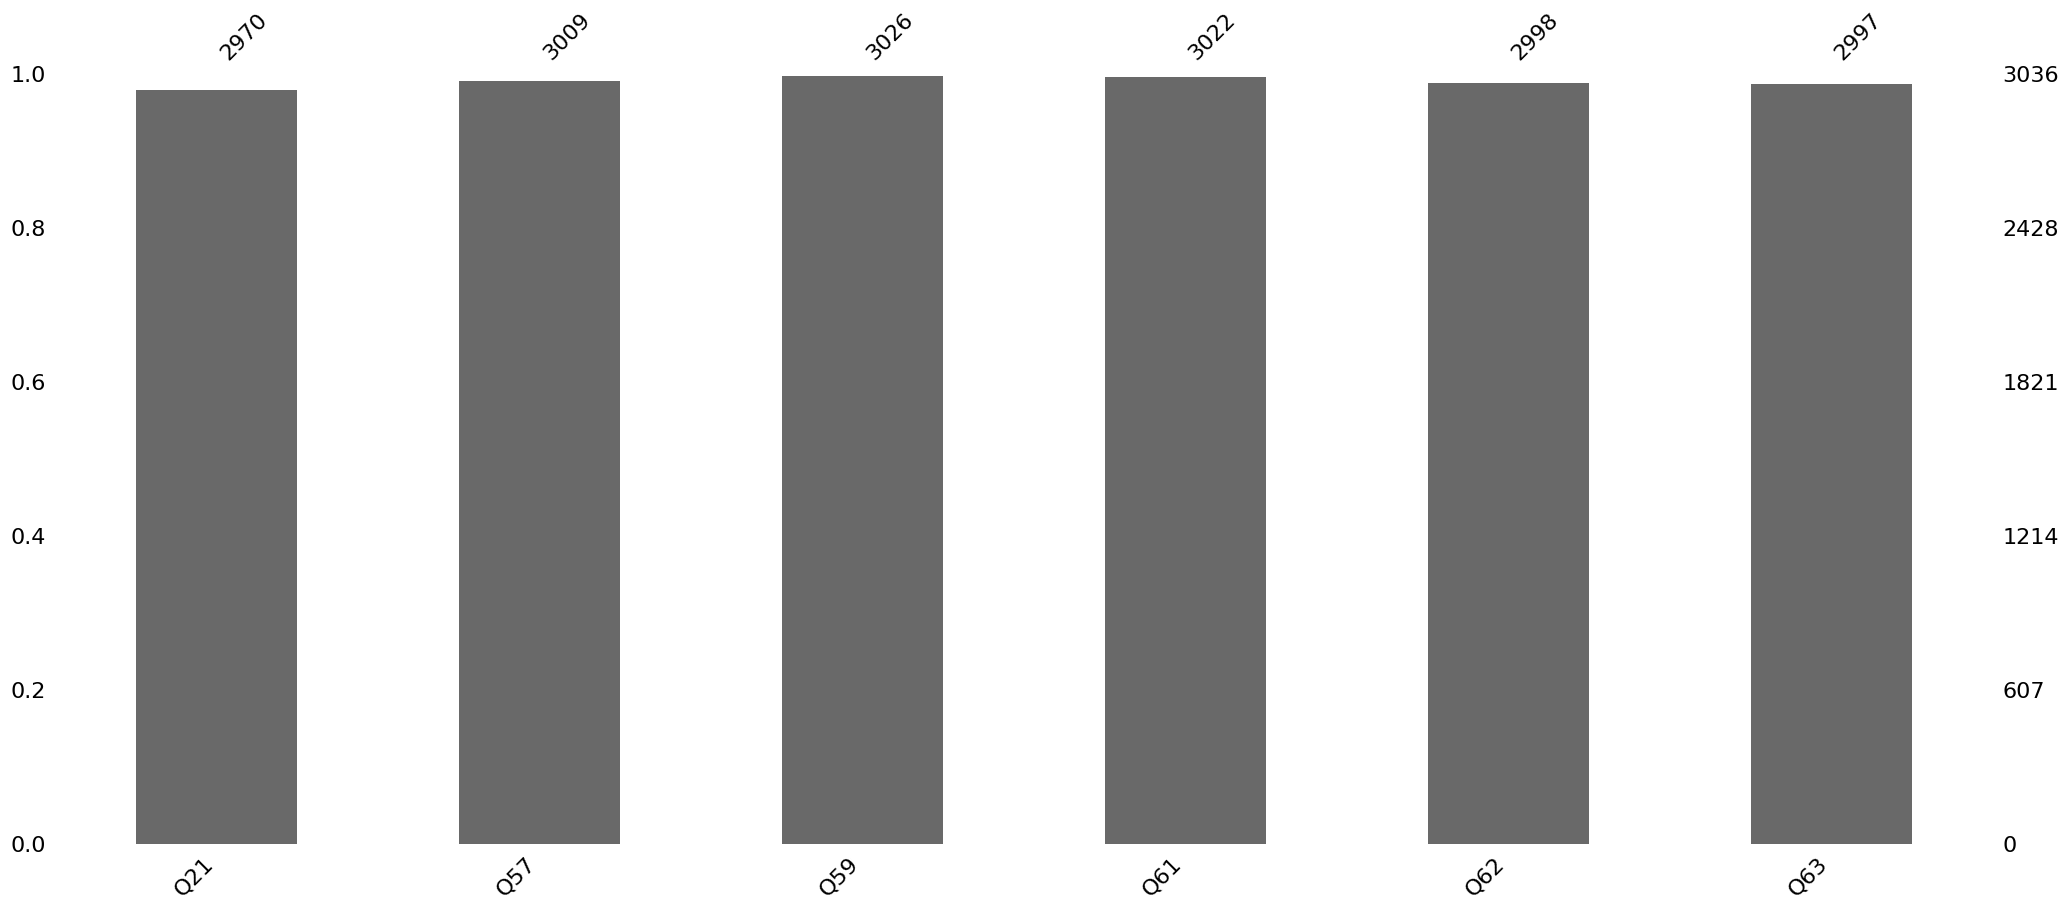

In [21]:
# Preapare dataframe for trust
df_cn_trust = df_cn.loc[:,['Q21','Q57','Q59', 'Q61', 'Q62', 'Q63']]
# Visualize the missing values in each column
msno.bar(df_cn_trust)

In [22]:
#Calculate how many missing values in each column
df_cn_trust.isnull().sum()

Q21    66
Q57    27
Q59    10
Q61    14
Q62    38
Q63    39
dtype: int64

In [23]:
df_cn_trust = df_cn_trust.rename(columns={'Q21': 'NeighborImmi','Q57':'TrustMost','Q59':'TrustNeighbor','Q61':'TrustNewPeo',
                                               'Q62':'TrustNewPeoReli','Q63':'TrustNewPeoNat'})

In [24]:
df_cn_trust.describe()

,NeighborImmi,TrustMost,TrustNeighbor,TrustNewPeo,TrustNewPeoReli,TrustNewPeoNat
count,2970.000000,3009.000000,3026.000000,3022.000000,2998.000000,2997.000000
mean,1.738047,1.345630,2.008262,3.049305,3.016344,3.072406
std,0.439771,0.475652,0.582044,0.588889,0.667717,0.656509
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,3.000000,3.000000,3.000000
50%,2.000000,1.000000,2.000000,3.000000,3.000000,3.000000
75%,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000
max,2.000000,2.000000,4.000000,4.000000,4.000000,4.000000


In [25]:
# Calculate the avg sum of the columns
df_cn_trust['TrustAvg'] = (df_cn_trust['TrustNeighbor'] + df_cn_trust['TrustNewPeo'] 
                        + df_cn_trust['TrustNewPeoReli'] + df_cn_trust['TrustNewPeoNat'])/4


In [26]:
df_cn_trust['TrustAvg'].describe()

count    2971.000000
mean        2.786688
std         0.436112
min         1.000000
25%         2.500000
50%         2.750000
75%         3.000000
max         4.000000
Name: TrustAvg, dtype: float64

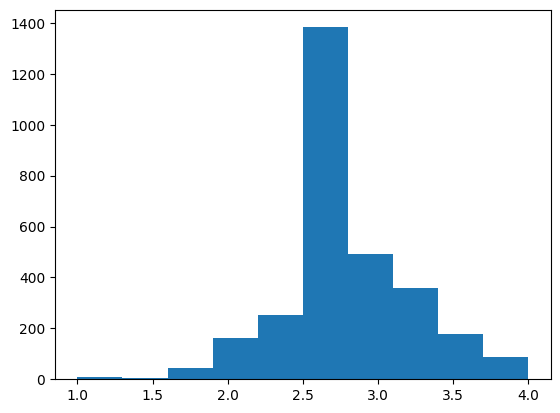

In [27]:
# Extract the values from the "TrustAvg" column
values = df_cn_trust['TrustAvg'].values

# Create a histogram of the values
plt.hist(values)

# Show the plot
plt.show()

In [29]:
df_cn_trust['TrustAvg'].value_counts()

2.75    968
3.00    491
2.50    415
3.25    359
2.25    254
3.50    176
2.00    161
3.75     81
1.75     46
4.00      8
1.00      7
1.50      4
1.25      1
Name: TrustAvg, dtype: int64

In [30]:
# We will assign simple integer to these values
# Create the mapping dictionary
mapping = {1.00: 1, 1.25: 2, 1.50: 3, 1.75: 4, 2.00: 5, 2.25: 6, 2.50: 7, 2.75: 8,
           3.00: 9, 3.25: 10, 3.50:11, 3.75:12, 4.00:13}

# Use the map function to apply the mapping to the 'FinanceSta' column
df_cn_trust['TrustAvg'] = df_cn_trust['TrustAvg'].map(mapping)

In [31]:
df_cn_trust = df_cn_trust.drop(['TrustNeighbor','TrustNewPeo','TrustNewPeoReli',
                                 'TrustNewPeoNat'],axis=1)

In [32]:
df_cn_trust

,NeighborImmi,TrustMost,TrustAvg
1658,1.0,1.0,8.0
1659,1.0,1.0,9.0
1660,1.0,1.0,8.0
1661,1.0,2.0,9.0
1662,2.0,1.0,9.0
...,...,...,...
4689,1.0,2.0,9.0
4690,2.0,1.0,8.0
4691,2.0,1.0,11.0
4692,2.0,1.0,8.0


<AxesSubplot: >

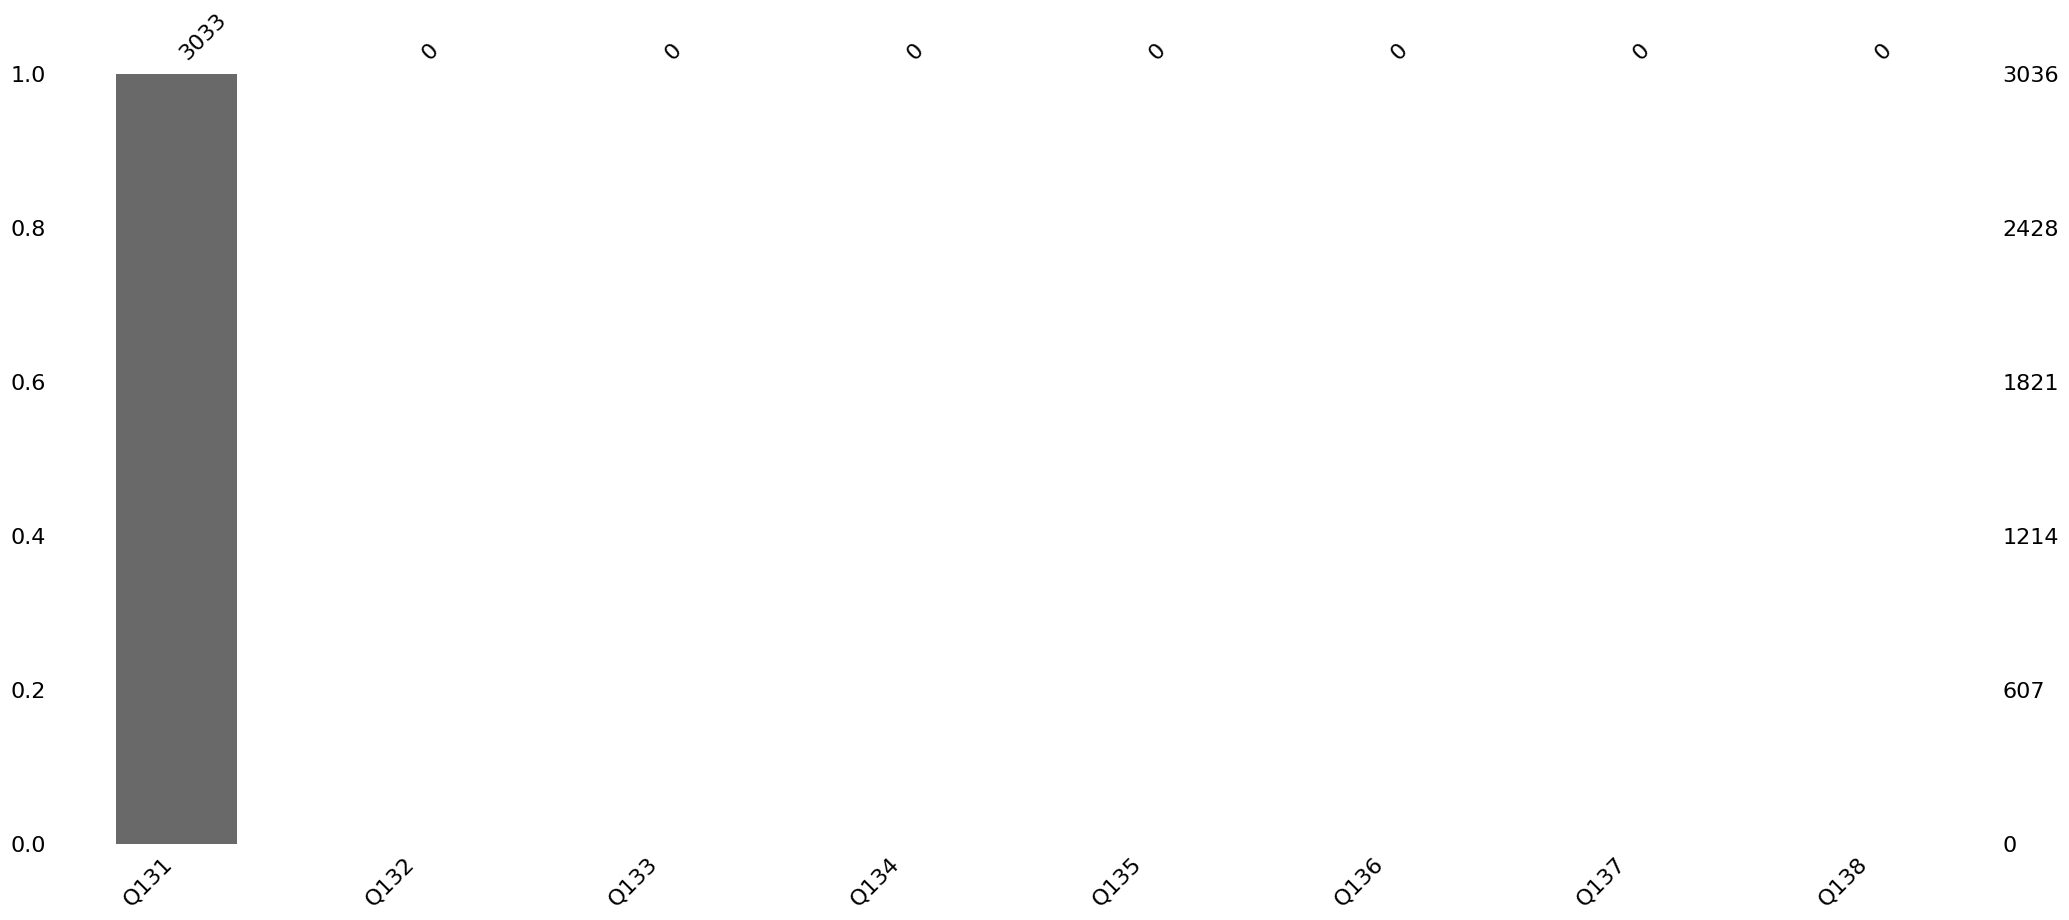

In [33]:
# Preapare dataframe for secure
df_cn_secure = df_cn.loc[:,['Q131','Q132','Q133','Q134','Q135','Q136','Q137','Q138']]
# Visualize the missing values in each column
msno.bar(df_cn_secure)


In [34]:
#Calculate how many missing values in each column
df_cn_secure.isnull().sum()

Q131       3
Q132    3036
Q133    3036
Q134    3036
Q135    3036
Q136    3036
Q137    3036
Q138    3036
dtype: int64

In [35]:
df_cn_secure = df_cn_secure.drop(['Q132','Q133','Q134','Q135','Q136','Q137','Q138'],axis=1)

In [36]:
df_cn_secure = df_cn_secure.rename(columns={'Q131':'SecureLevel'})

In [37]:
df_cn_secure 

,SecureLevel
1658,1.0
1659,1.0
1660,2.0
1661,3.0
1662,2.0
...,...
4689,2.0
4690,2.0
4691,2.0
4692,2.0


<AxesSubplot: >

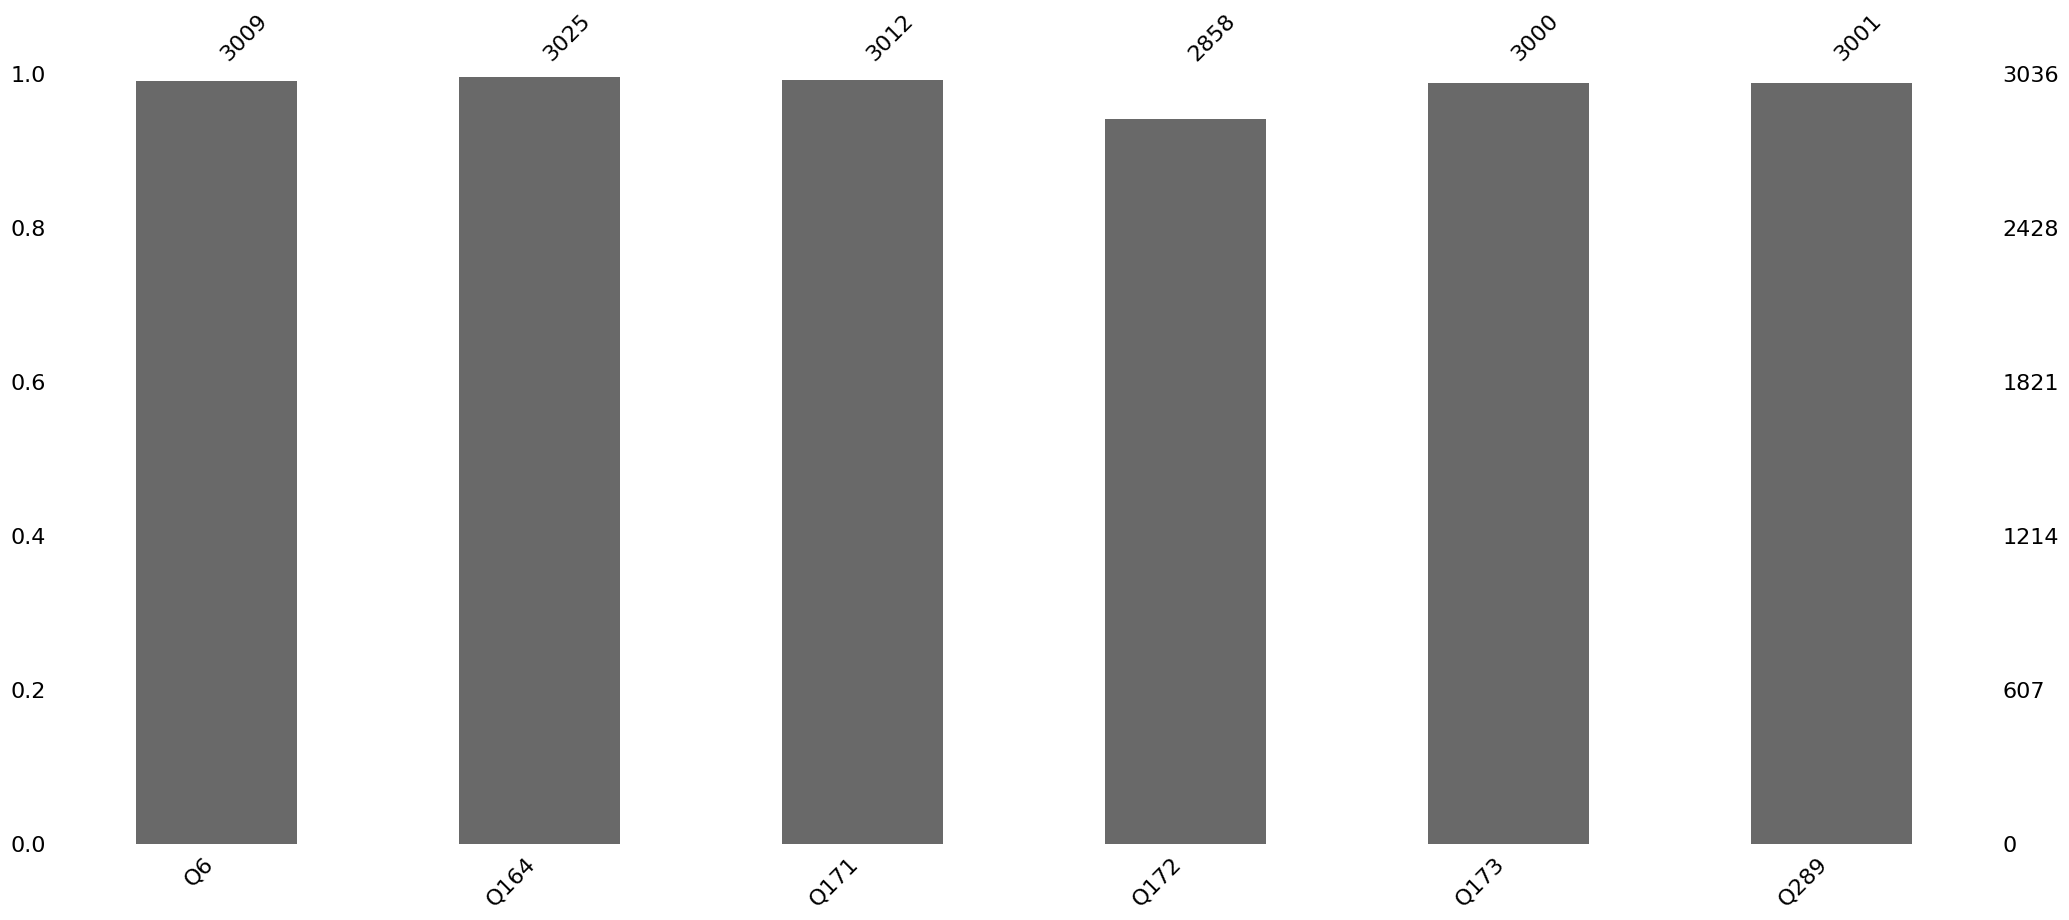

In [38]:
# Preapare dataframe for religion
df_cn_religion = df_cn.loc[:,['Q6','Q164','Q171','Q172','Q173','Q289']]
# Visualize the missing values in each column
msno.bar(df_cn_religion)


In [39]:
#Calculate how many missing values in each column
df_cn_religion.isnull().sum()

Q6       27
Q164     11
Q171     24
Q172    178
Q173     36
Q289     35
dtype: int64

In [40]:
df_cn_religion = df_cn_religion.rename(columns={'Q6':'ReligionImp','Q164':'GodImp',
                                                'Q171':'ReligionSer','Q172':'Pray',
                                                'Q173':'ReligousSelf','Q289':'ReligiousBelong' })

In [41]:
df_cn_religion

,ReligionImp,GodImp,ReligionSer,Pray,ReligousSelf,ReligiousBelong
1658,3.0,2.0,5.0,8.0,1.0,0.0
1659,3.0,1.0,7.0,8.0,2.0,0.0
1660,4.0,1.0,7.0,8.0,3.0,0.0
1661,3.0,1.0,7.0,8.0,2.0,0.0
1662,3.0,1.0,7.0,8.0,2.0,0.0
...,...,...,...,...,...,...
4689,2.0,10.0,6.0,NaN,1.0,7.0
4690,3.0,1.0,7.0,8.0,3.0,0.0
4691,4.0,5.0,7.0,8.0,3.0,0.0
4692,3.0,3.0,4.0,6.0,1.0,5.0


In [42]:
# Calculate the avg sum of the columns
df_cn_religion['ReligionAct'] = (df_cn_religion['ReligionSer']+df_cn_religion['Pray'])/2


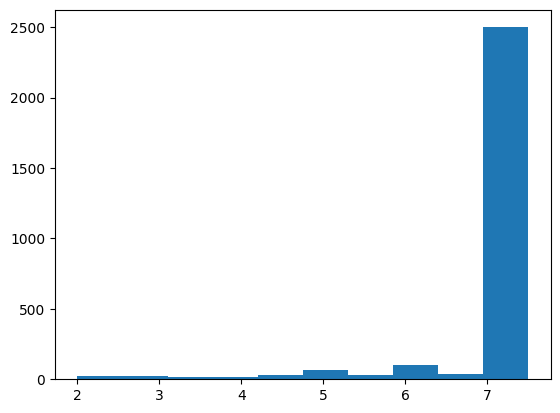

In [43]:
# Extract the values from the "TrustAvg" column
values = df_cn_religion['ReligionAct'].values

# Create a histogram of the values
plt.hist(values)

# Show the plot
plt.show()

In [44]:
# The std is too low, useless data
df_cn_religion['ReligionAct'].value_counts()

7.5    2249
7.0     250
6.0     102
5.0      64
6.5      35
4.5      28
5.5      27
3.0      21
4.0      18
3.5      17
2.5      13
2.0      12
Name: ReligionAct, dtype: int64

In [45]:
df_cn_religion = df_cn_religion.drop(['Pray', 'ReligionSer','ReligionAct'],axis=1)

In [46]:
df_cn_religion.loc[df_cn_religion['ReligiousBelong'] != 0, 'ReligiousBelong'] = 1

In [47]:
df_cn_religion.loc[df_cn_religion['ReligousSelf'] != 1, 'ReligousSelf'] = 2

In [48]:
df_cn_religion.describe()

,ReligionImp,GodImp,ReligousSelf,ReligiousBelong
count,3009.000000,3025.000000,3036.000000,3036.000000
mean,3.248255,2.803306,1.843544,0.142292
std,0.784989,2.541323,0.363347,0.349407
min,1.000000,1.000000,1.000000,0.000000
25%,3.000000,1.000000,2.000000,0.000000
50%,3.000000,1.000000,2.000000,0.000000
75%,4.000000,4.000000,2.000000,0.000000
max,4.000000,10.000000,2.000000,1.000000


In [49]:
df_cn_religion

,ReligionImp,GodImp,ReligousSelf,ReligiousBelong
1658,3.0,2.0,1.0,0.0
1659,3.0,1.0,2.0,0.0
1660,4.0,1.0,2.0,0.0
1661,3.0,1.0,2.0,0.0
1662,3.0,1.0,2.0,0.0
...,...,...,...,...
4689,2.0,10.0,1.0,1.0
4690,3.0,1.0,2.0,0.0
4691,4.0,5.0,2.0,0.0
4692,3.0,3.0,1.0,1.0


<AxesSubplot: >

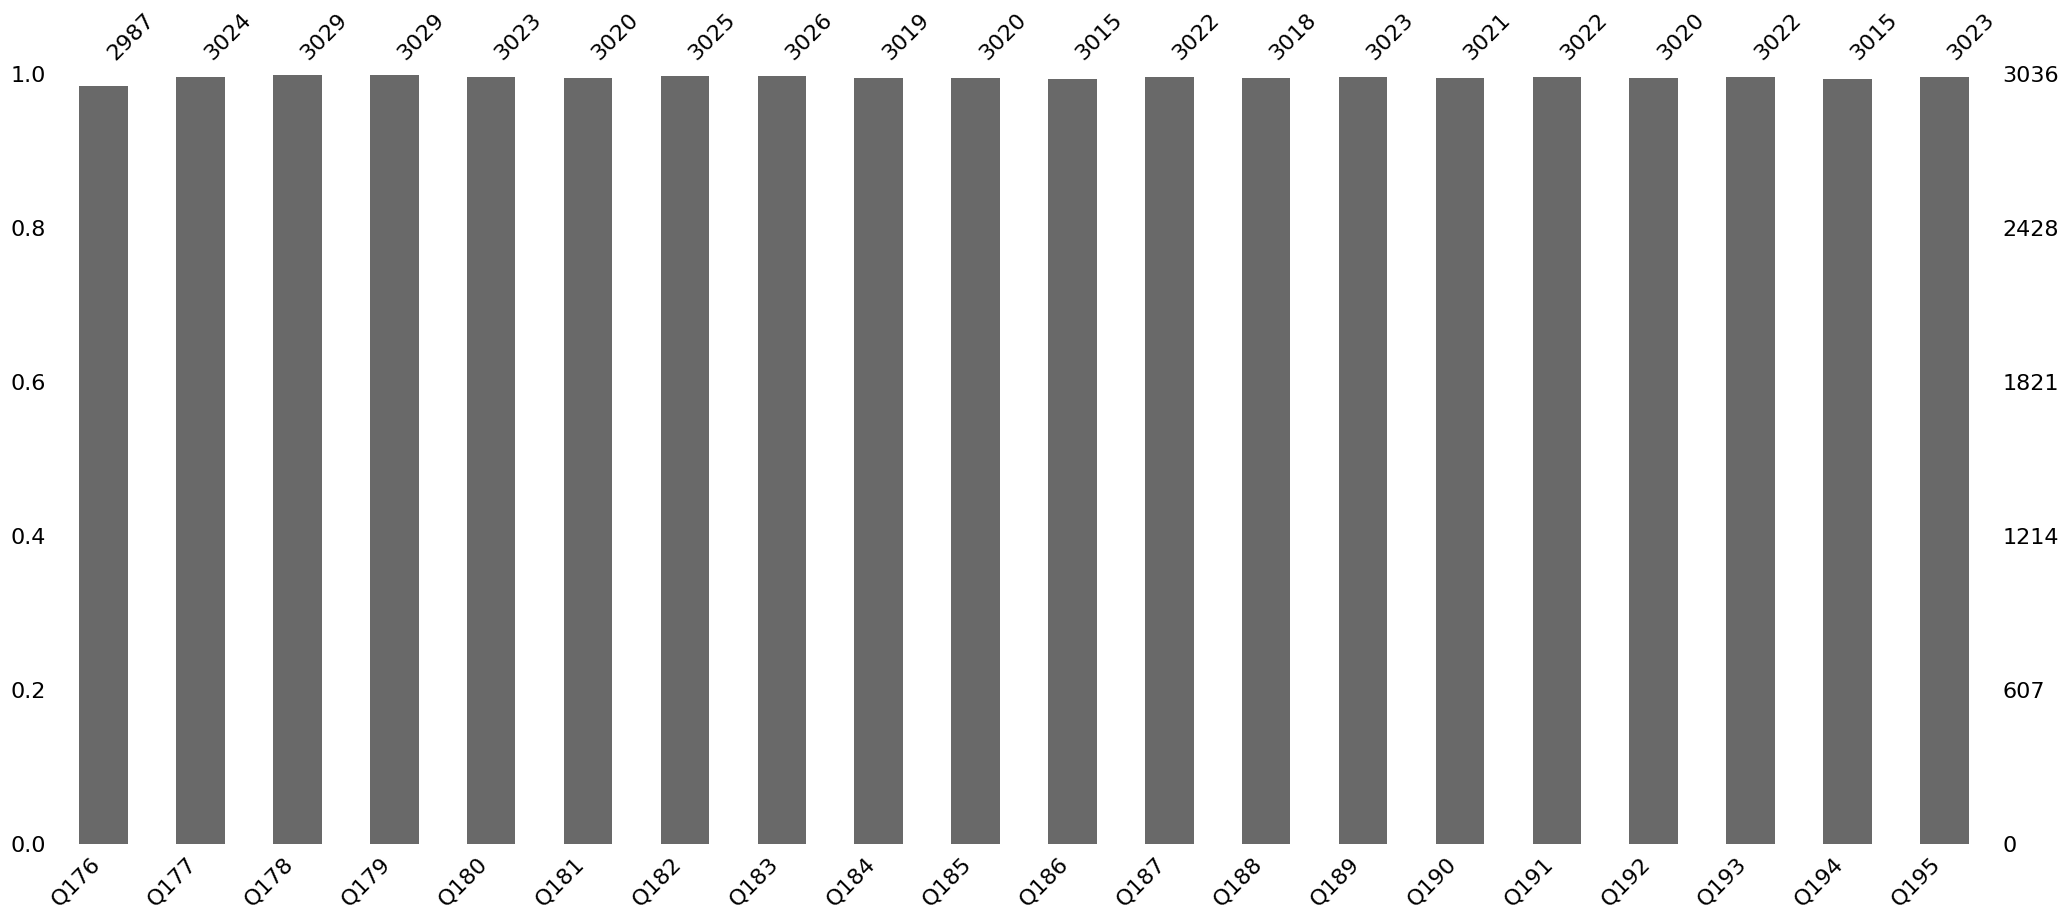

In [50]:
# Preapare dataframe for morality
df_cn_morality = df_cn.loc[:,['Q176', 'Q177','Q178', 'Q179', 'Q180', 'Q181', 'Q182', 'Q183', 'Q184',
'Q185', 'Q186','Q187', 'Q188', 'Q189', 'Q190', 'Q191', 'Q192', 'Q193', 
'Q194', 'Q195']]
# Visualize the missing values in each column
msno.bar(df_cn_morality)

In [51]:
#Calculate how many missing values in each column
df_cn_morality.isnull().sum()

Q176    49
Q177    12
Q178     7
Q179     7
Q180    13
Q181    16
Q182    11
Q183    10
Q184    17
Q185    16
Q186    21
Q187    14
Q188    18
Q189    13
Q190    15
Q191    14
Q192    16
Q193    14
Q194    21
Q195    13
dtype: int64

In [52]:
# Create an empty list to store the column names
column_names = []

# Use a for loop to generate the column names
for i in range(177, 196):
    column_name = 'Q' + str(i)
    column_names.append(column_name)

# Calculate the sum of the columns
df_cn_morality['MoralityLevel'] = df_cn_morality[column_names].mean(axis=1)

In [53]:
df_cn_morality['MoralityLevel'].value_counts()

1.000000    118
1.473684    115
1.842105     92
1.947368     85
1.631579     82
           ... 
3.941176      1
2.823529      1
7.842105      1
3.062500      1
4.888889      1
Name: MoralityLevel, Length: 174, dtype: int64

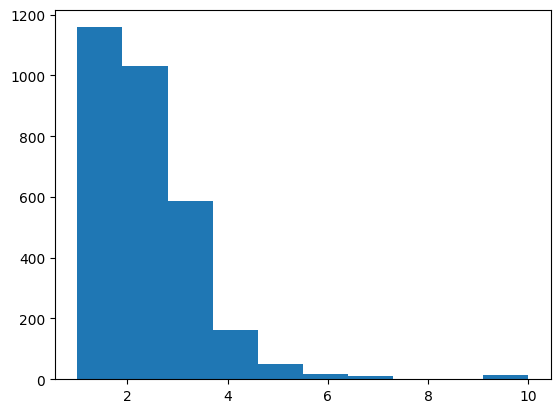

In [54]:
# Extract the values from the "TrustAvg" column
values = df_cn_morality['MoralityLevel'].values

# Create a histogram of the values
plt.hist(values)

# Show the plot
plt.show()

In [55]:
df_cn_morality['MoralityLevel'] = pd.cut(df_cn_morality['MoralityLevel'], 10)


In [56]:
df_cn_morality['MoralityLevel'].value_counts()

(0.991, 1.9]    1158
(1.9, 2.8]      1029
(2.8, 3.7]       586
(3.7, 4.6]       163
(4.6, 5.5]        51
(5.5, 6.4]        17
(9.1, 10.0]       14
(6.4, 7.3]        11
(7.3, 8.2]         2
(8.2, 9.1]         2
Name: MoralityLevel, dtype: int64

In [57]:
def assign_value(x):
    if x.right <= 1.9:
        return 1
    elif x.right <= 2.8:
        return 2
    elif x.right <= 3.7:
        return 3
    elif x.right <= 4.6:
        return 4
    elif x.right <= 5.5:
        return 5
    elif x.right <= 6.4:
        return 6
    elif x.right <= 7.3:
        return 7
    elif x.right <= 8.2:
        return 8
    elif x.right <= 9.1:
        return 9
    else:
        return 10

df_cn_morality['MoralityLevel'] = df_cn_morality['MoralityLevel'].apply(assign_value)

In [58]:
df_cn_morality = df_cn_morality.drop(columns=column_names)

In [59]:
df_cn_morality = df_cn_morality.rename(columns={'Q176':'MoralSense'})

In [60]:
df_cn_morality

,MoralSense,MoralityLevel
1658,7.0,2
1659,1.0,1
1660,4.0,1
1661,4.0,2
1662,1.0,1
...,...,...
4689,2.0,1
4690,5.0,1
4691,6.0,1
4692,3.0,1


<AxesSubplot: >

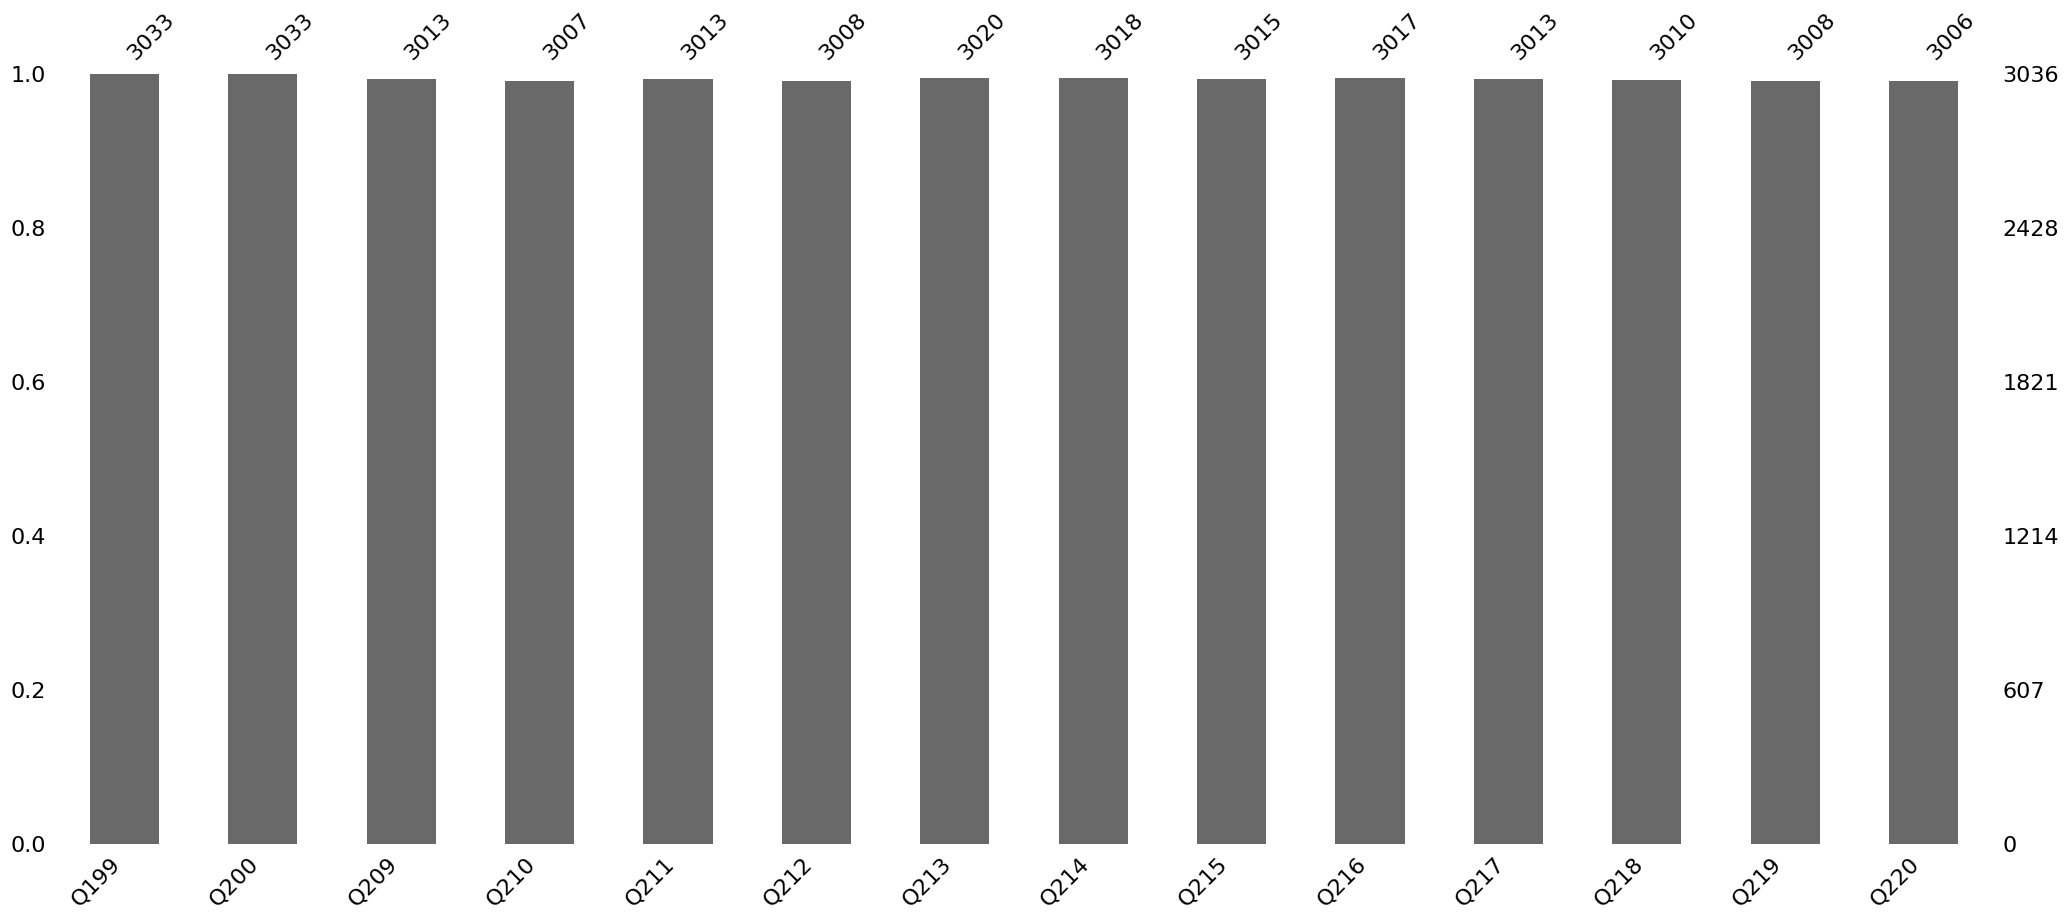

In [61]:
# Preapare dataframe for politics
df_cn_politics = df_cn.loc[:,['Q199', 'Q200', 'Q209', 'Q210', 'Q211', 'Q212', 'Q213', 'Q214', 'Q215',
'Q216', 'Q217', 'Q218', 'Q219', 'Q220']]
# Visualize the missing values in each column
msno.bar(df_cn_politics)

In [62]:
#Calculate how many missing values in each column
df_cn_politics.isnull().sum()

Q199     3
Q200     3
Q209    23
Q210    29
Q211    23
Q212    28
Q213    16
Q214    18
Q215    21
Q216    19
Q217    23
Q218    26
Q219    28
Q220    30
dtype: int64

In [63]:
# Create an empty list to store the column names
column_names = ['Q200']

# Use a for loop to generate the column names
for i in range(209, 221):
    column_name = 'Q' + str(i)
    column_names.append(column_name)

# Calculate the sum of the columns
df_cn_politics['PoliticsAct'] = df_cn_politics[column_names].mean(axis=1)

In [64]:
df_cn_politics = df_cn_politics.drop(columns=column_names)

In [65]:
df_cn_politics = df_cn_politics.rename(columns={'Q199':'PoliticsInt'})

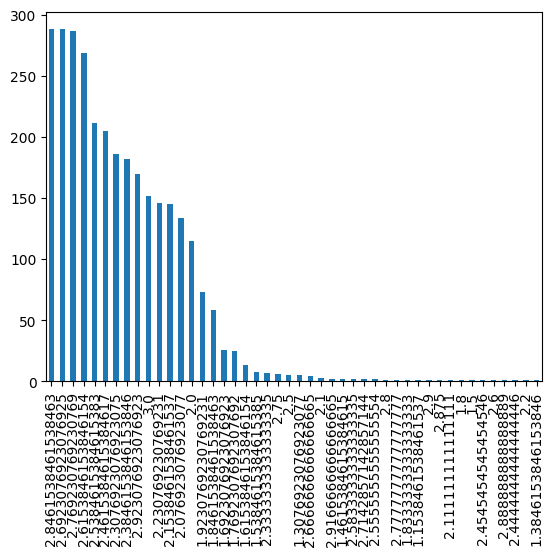

In [66]:
df_cn_politics['PoliticsAct'].value_counts().plot.bar()
plt.show()

In [67]:
df_cn_politics['PoliticsAct']= pd.cut(df_cn_politics['PoliticsAct'], 10)


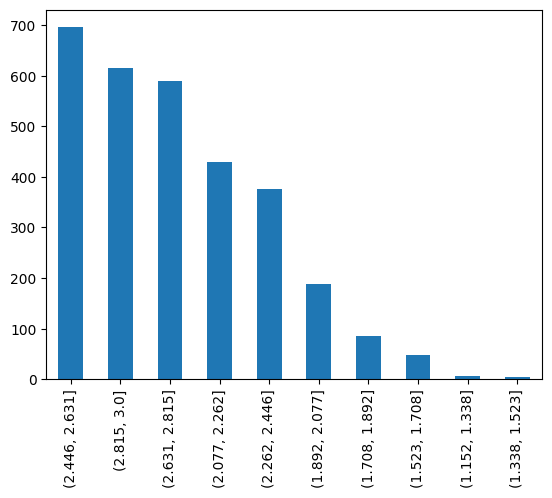

In [68]:
df_cn_politics['PoliticsAct'].value_counts().plot.bar()
plt.show()

In [69]:
df_cn_politics['PoliticsAct'].value_counts()

(2.446, 2.631]    696
(2.815, 3.0]      615
(2.631, 2.815]    589
(2.077, 2.262]    430
(2.262, 2.446]    376
(1.892, 2.077]    188
(1.708, 1.892]     85
(1.523, 1.708]     47
(1.152, 1.338]      6
(1.338, 1.523]      4
Name: PoliticsAct, dtype: int64

In [70]:
def assign_value(x):
    if x.right <= 1.338:
        return 1
    elif x.right <= 1.523:
        return 2
    elif x.right <= 1.708:
        return 3
    elif x.right <= 1.892:
        return 4
    elif x.right <= 2.077:
        return 5
    elif x.right <= 2.262:
        return 6
    elif x.right <= 2.446:
        return 7
    elif x.right <= 2.631:
        return 8
    elif x.right <= 2.815:
        return 9
    else:
        return 10

df_cn_politics['PoliticsAct'] = df_cn_politics['PoliticsAct'].apply(assign_value)


In [71]:
df_cn_politics['PoliticsAct'].dtype

CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ordered=True)

In [72]:
# Get the integer codes for the categories
df_cn_politics['PoliticsAct'] = df_cn_politics['PoliticsAct'].cat.codes



In [73]:
df_cn_politics


,PoliticsInt,PoliticsAct
1658,2.0,7
1659,4.0,9
1660,3.0,8
1661,2.0,7
1662,2.0,7
...,...,...
4689,2.0,7
4690,3.0,8
4691,3.0,7
4692,2.0,7


<AxesSubplot: >

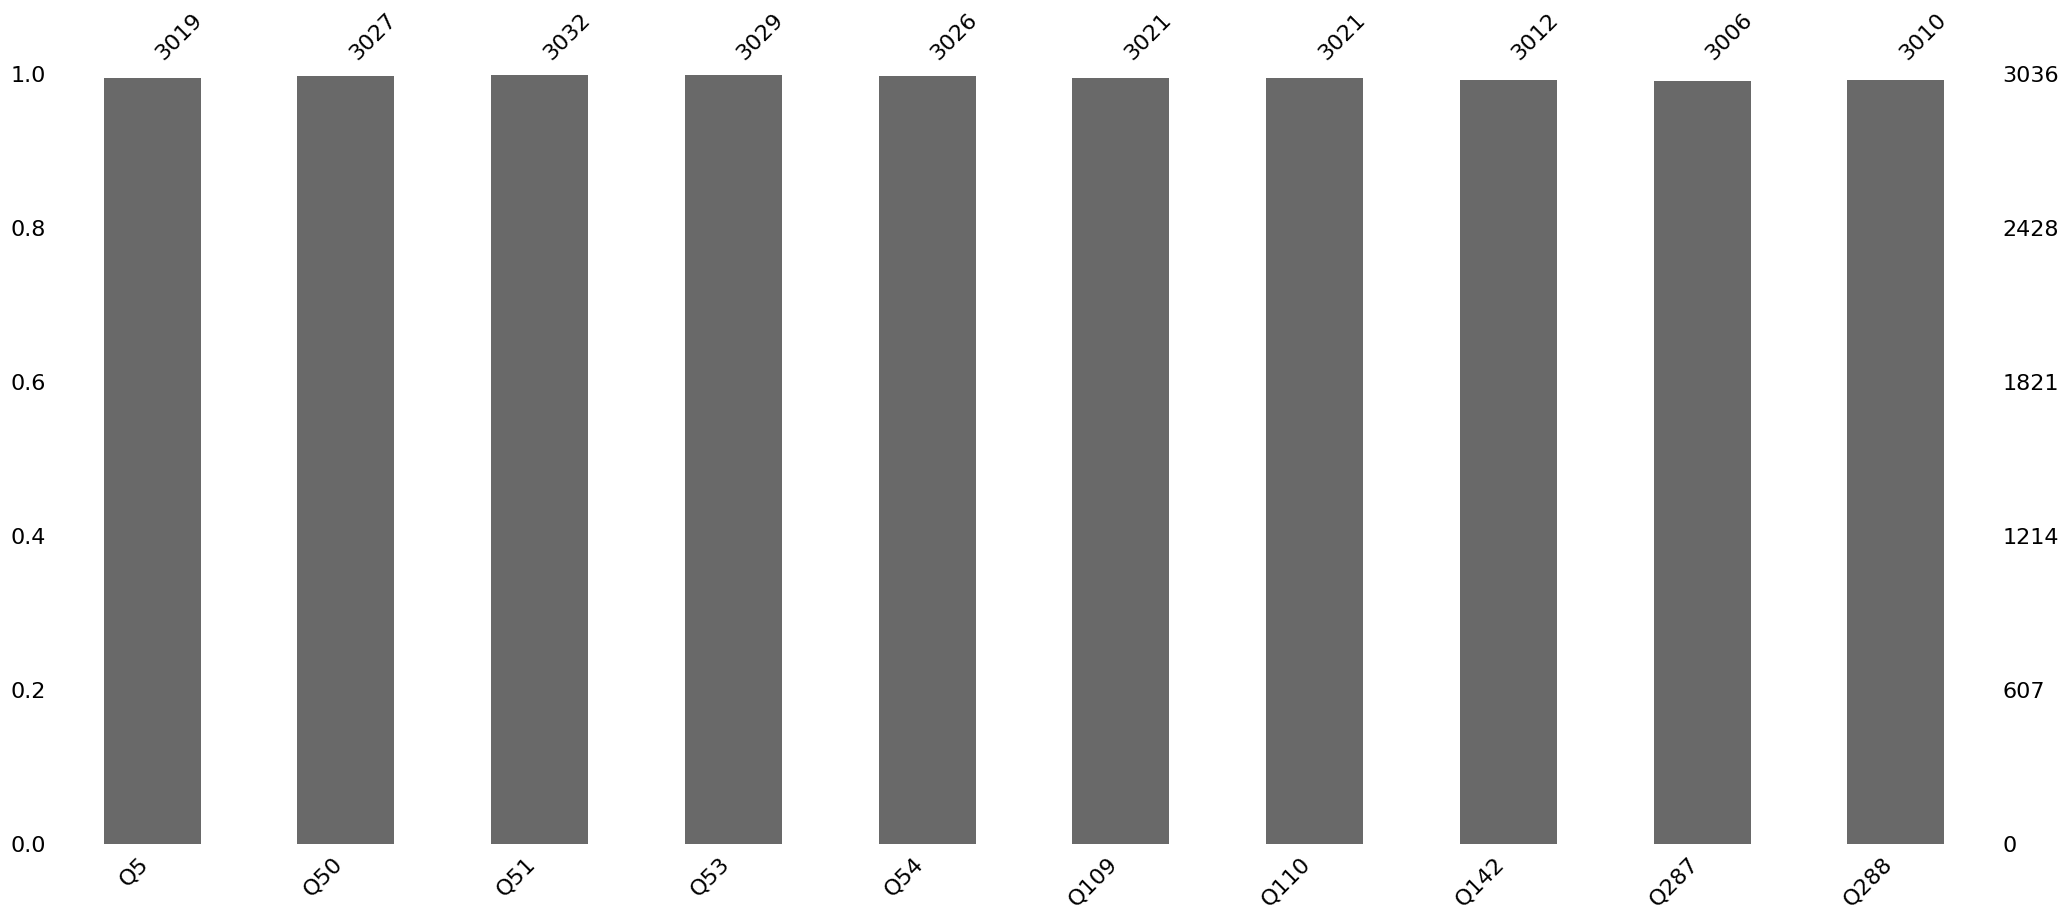

In [74]:
# Preapare dataframe for economics
df_cn_economics = df_cn.loc[:,['Q5','Q50','Q51','Q53','Q54','Q109','Q110','Q142','Q287','Q288']]
# Visualize the missing values in each column
msno.bar(df_cn_economics)

In [75]:
#Calculate how many missing values in each column
df_cn_economics.isnull().sum()

Q5      17
Q50      9
Q51      4
Q53      7
Q54     10
Q109    15
Q110    15
Q142    24
Q287    30
Q288    26
dtype: int64

In [76]:
df_cn_economics = df_cn_economics.rename(columns = {'Q5':'WorkImp','Q50':'FinanceSat',
                                                    'Q51':'EnoughFood','Q53':'EnoughMed',
                                                    'Q54':'EnoughCash',
                                                   'Q109':'CompetitionAtt','Q110':'HardWork',
                                                   'Q142':'WorryJob','Q287':'ClassSelf',
                                                   'Q288':'ClassHouse'})

In [77]:
df_cn_economics

,WorkImp,FinanceSat,EnoughFood,EnoughMed,EnoughCash,CompetitionAtt,HardWork,WorryJob,ClassSelf,ClassHouse
1658,2.0,5.0,4.0,4.0,4.0,1.0,1.0,2.0,3.0,4.0
1659,1.0,10.0,4.0,4.0,4.0,1.0,1.0,4.0,NaN,3.0
1660,3.0,10.0,4.0,4.0,4.0,1.0,1.0,4.0,3.0,6.0
1661,1.0,5.0,4.0,3.0,3.0,3.0,2.0,2.0,4.0,5.0
1662,2.0,10.0,4.0,4.0,4.0,1.0,1.0,2.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...
4689,2.0,3.0,3.0,3.0,3.0,3.0,8.0,2.0,3.0,2.0
4690,2.0,9.0,4.0,4.0,4.0,5.0,1.0,2.0,4.0,2.0
4691,2.0,6.0,4.0,4.0,4.0,8.0,7.0,3.0,4.0,6.0
4692,2.0,5.0,4.0,4.0,4.0,4.0,2.0,3.0,4.0,3.0


In [78]:
# Calculate the avg sum of the columns
df_cn_economics['FinanceSta'] = (df_cn_economics['EnoughFood'] +df_cn_economics['EnoughMed'] 
                        + df_cn_economics['EnoughCash'] )/3


In [79]:
#df_cn_economics = df_cn_economics.drop(['EnoughFood', 'EnoughMed','EnoughCash'],axis=1)

In [80]:
df_cn_economics.describe()

,WorkImp,FinanceSat,EnoughFood,EnoughMed,EnoughCash,CompetitionAtt,HardWork,WorryJob,ClassSelf,ClassHouse,FinanceSta
count,3019.000000,3027.000000,3032.000000,3029.000000,3026.000000,3021.000000,3021.000000,3012.000000,3006.000000,3010.000000,3023.000000
mean,1.723750,6.518005,3.887203,3.682073,3.629213,3.384972,3.723932,2.276228,3.704923,4.147176,3.732936
std,0.756594,2.278652,0.388478,0.671371,0.746557,2.201390,2.732304,0.962633,0.802506,1.843837,0.470605
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,5.000000,4.000000,4.000000,4.000000,1.000000,1.000000,2.000000,3.000000,3.000000,3.666667
50%,2.000000,7.000000,4.000000,4.000000,4.000000,3.000000,3.000000,2.000000,4.000000,4.000000,4.000000
75%,2.000000,8.000000,4.000000,4.000000,4.000000,5.000000,5.000000,3.000000,4.000000,5.000000,4.000000
max,4.000000,10.000000,4.000000,4.000000,4.000000,10.000000,10.000000,4.000000,5.000000,10.000000,4.000000


<AxesSubplot: >

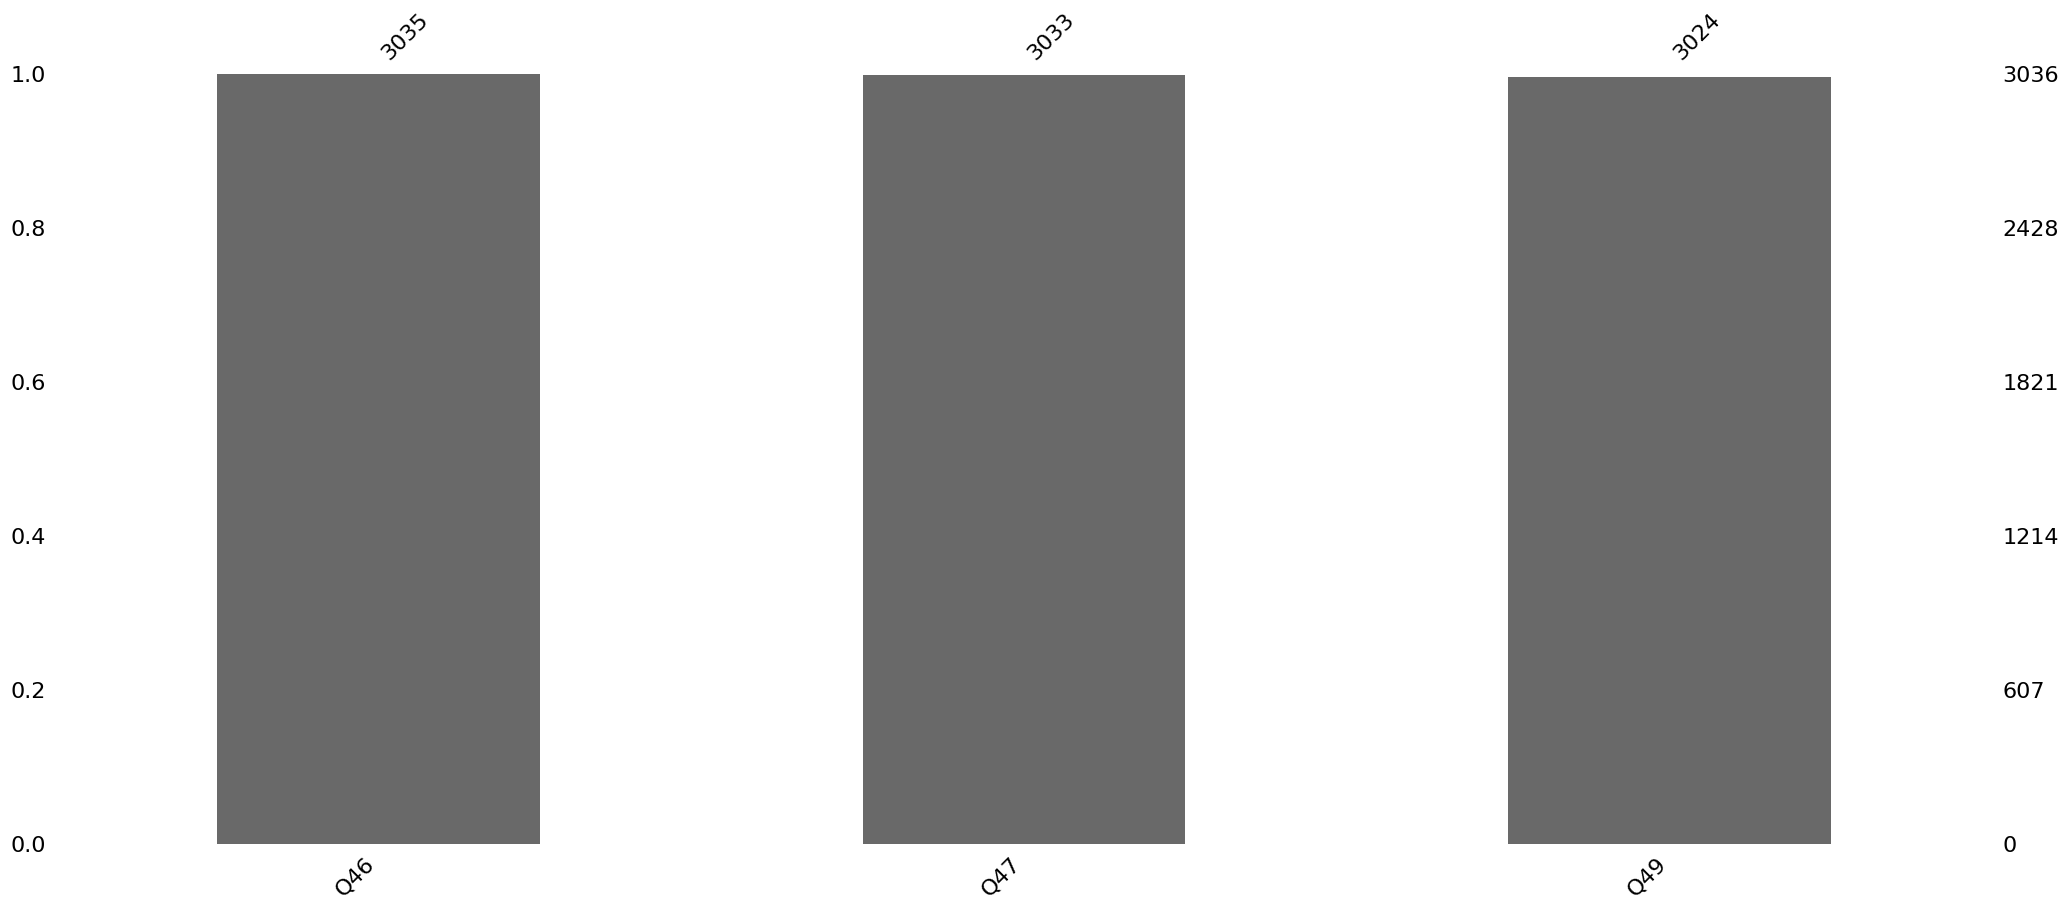

In [81]:
# Preapare dataframe for happiness
df_cn_happy = df_cn.loc[:,['Q46', 'Q47', 'Q49']]
# Visualize the missing values in each column
msno.bar(df_cn_happy)

In [82]:
#Calculate how many missing values in each column
df_cn_happy.isnull().sum()

Q46     1
Q47     3
Q49    12
dtype: int64

In [83]:
df_cn_happy = df_cn_happy.rename(columns = {'Q46':'Happy','Q47':'Health','Q49':'LifeSat'})

In [84]:
df_cn_happy

,Happy,Health,LifeSat
1658,2.0,2.0,5.0
1659,1.0,1.0,10.0
1660,1.0,1.0,10.0
1661,2.0,2.0,5.0
1662,1.0,1.0,10.0
...,...,...,...
4689,3.0,2.0,8.0
4690,1.0,1.0,9.0
4691,1.0,2.0,9.0
4692,2.0,2.0,6.0


### After processing the subsets of data, we combine them together as our final data set

In [93]:
pd.set_option('display.max_columns', None)
combine = pd.concat([df_cn_personal,df_cn_trust,df_cn_religion,
           df_cn_secure,df_cn_morality,df_cn_politics,
           df_cn_economics,df_cn_happy,df_cn_target],axis=1)
combine

,Sex,Age,FamilySize,WithParents,MaritalSta,HaveChild,Education,Working,Skilllevel,NeighborImmi,TrustMost,TrustAvg,ReligionImp,GodImp,ReligousSelf,ReligiousBelong,SecureLevel,MoralSense,MoralityLevel,PoliticsInt,PoliticsAct,WorkImp,FinanceSat,EnoughFood,EnoughMed,EnoughCash,CompetitionAtt,HardWork,WorryJob,ClassSelf,ClassHouse,FinanceSta,Happy,Health,LifeSat,Impact_level,Attitude
1658,2.0,38.0,3.0,1.0,1.0,1.0,NaN,0,NaN,1.0,1.0,8.0,3.0,2.0,1.0,0.0,1.0,7.0,2,2.0,7,2.0,5.0,4.0,4.0,4.0,1.0,1.0,2.0,3.0,4.0,4.000000,2.0,2.0,5.0,3.0,0.0
1659,2.0,52.0,6.0,1.0,1.0,2.0,1.0,1,2.0,1.0,1.0,9.0,3.0,1.0,2.0,0.0,1.0,1.0,1,4.0,9,1.0,10.0,4.0,4.0,4.0,1.0,1.0,4.0,NaN,3.0,4.000000,1.0,1.0,10.0,5.0,1.0
1660,2.0,69.0,1.0,1.0,5.0,2.0,3.0,0,NaN,1.0,1.0,8.0,4.0,1.0,2.0,0.0,2.0,4.0,1,3.0,8,3.0,10.0,4.0,4.0,4.0,1.0,1.0,4.0,3.0,6.0,4.000000,1.0,1.0,10.0,4.0,0.0
1661,1.0,48.0,3.0,1.0,1.0,1.0,NaN,0,NaN,1.0,2.0,9.0,3.0,1.0,2.0,0.0,3.0,4.0,2,2.0,7,1.0,5.0,4.0,3.0,3.0,3.0,2.0,2.0,4.0,5.0,3.333333,2.0,2.0,5.0,5.0,0.0
1662,1.0,70.0,5.0,1.0,1.0,1.0,6.0,0,9.0,2.0,1.0,9.0,3.0,1.0,2.0,0.0,2.0,1.0,1,2.0,7,2.0,10.0,4.0,4.0,4.0,1.0,1.0,2.0,3.0,4.0,4.000000,1.0,1.0,10.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4689,2.0,46.0,3.0,1.0,3.0,1.0,1.0,0,0.0,1.0,2.0,9.0,2.0,10.0,1.0,1.0,2.0,2.0,1,2.0,7,2.0,3.0,3.0,3.0,3.0,3.0,8.0,2.0,3.0,2.0,3.000000,3.0,2.0,8.0,3.0,1.0
4690,2.0,35.0,4.0,1.0,1.0,2.0,2.0,0,5.0,2.0,1.0,8.0,3.0,1.0,2.0,0.0,2.0,5.0,1,3.0,8,2.0,9.0,4.0,4.0,4.0,5.0,1.0,2.0,4.0,2.0,4.000000,1.0,1.0,9.0,4.0,1.0
4691,1.0,24.0,5.0,2.0,1.0,1.0,3.0,1,4.0,2.0,1.0,11.0,4.0,5.0,2.0,0.0,2.0,6.0,1,3.0,7,2.0,6.0,4.0,4.0,4.0,8.0,7.0,3.0,4.0,6.0,4.000000,1.0,2.0,9.0,4.0,0.0
4692,1.0,46.0,3.0,1.0,1.0,1.0,3.0,1,4.0,2.0,1.0,8.0,3.0,3.0,1.0,1.0,2.0,3.0,1,2.0,7,2.0,5.0,4.0,4.0,4.0,4.0,2.0,3.0,4.0,3.0,4.000000,2.0,2.0,6.0,4.0,0.0


In [94]:
combine.isnull().sum()

Sex                  0
Age                  0
FamilySize         157
WithParents         21
MaritalSta          18
HaveChild           37
Education           30
Working              0
Skilllevel         226
NeighborImmi        66
TrustMost           27
TrustAvg            65
ReligionImp         27
GodImp              11
ReligousSelf         0
ReligiousBelong      0
SecureLevel          3
MoralSense          49
MoralityLevel        3
PoliticsInt          3
PoliticsAct          0
WorkImp             17
FinanceSat           9
EnoughFood           4
EnoughMed            7
EnoughCash          10
CompetitionAtt      15
HardWork            15
WorryJob            24
ClassSelf           30
ClassHouse          26
FinanceSta          13
Happy                1
Health               3
LifeSat             12
Impact_level        47
Attitude             0
dtype: int64

## Here we only have Impact_level since in the data of China there's no Willing_Level

In [95]:
# Delete rows with missing values in the "Impact_level" column
combine = combine.dropna(subset=['Impact_level'])

/var/folders/j7/jq7zvfpd7qb610n57fjz1j2w0000gn/T/ipykernel_21730/830355400.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = combine.corr()


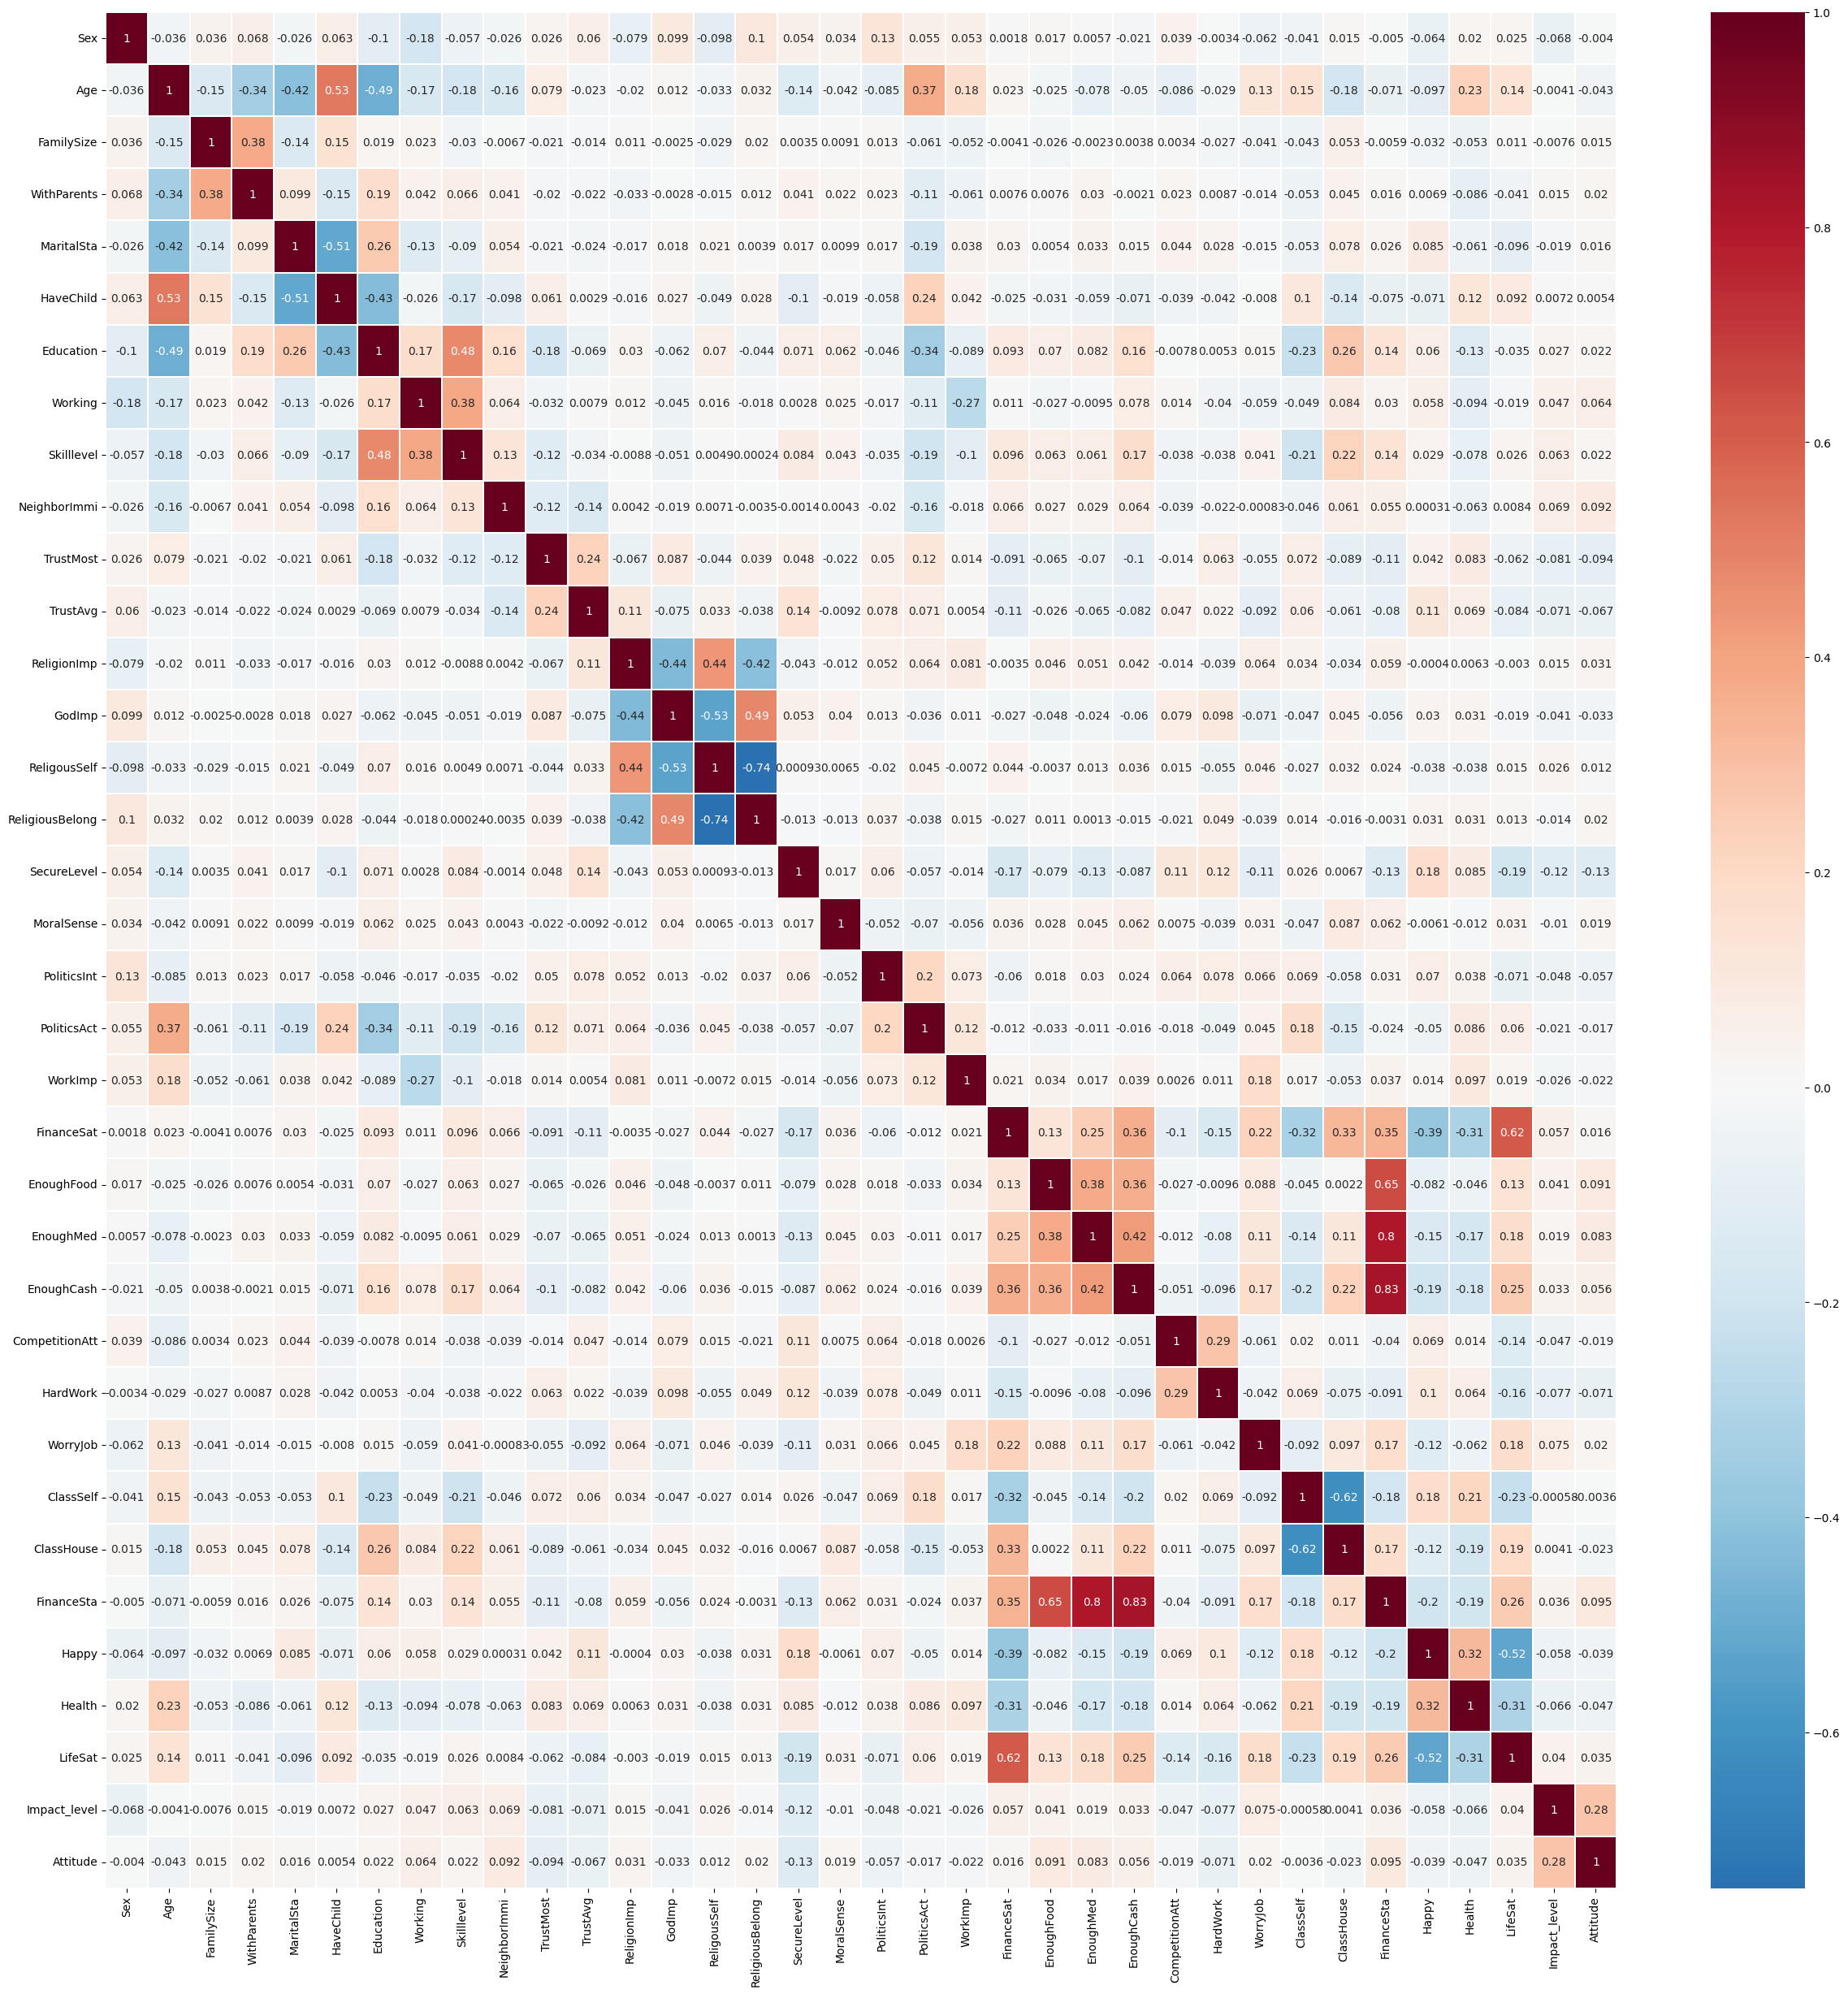

In [96]:
import seaborn as sns

# Calculate the Pearson correlation coefficient between the columns of the dataframe
corr = combine.corr()

# Visualize the correlation matrix as a heatmap
sns.set_context({"figure.figsize":(30,30)})
sns.heatmap(corr,annot=True,linewidths=0.3,cmap="RdBu_r",center=0)
# Show the plot
plt.show()

In [97]:
print(corr)


                      Sex       Age  FamilySize  WithParents  MaritalSta  \
Sex              1.000000 -0.035562    0.035730     0.067523   -0.026081   
Age             -0.035562  1.000000   -0.145299    -0.344402   -0.415355   
FamilySize       0.035730 -0.145299    1.000000     0.376823   -0.142345   
WithParents      0.067523 -0.344402    0.376823     1.000000    0.098907   
MaritalSta      -0.026081 -0.415355   -0.142345     0.098907    1.000000   
HaveChild        0.062673  0.526640    0.146083    -0.145480   -0.513387   
Education       -0.102833 -0.487631    0.019433     0.187405    0.260619   
Working         -0.180924 -0.168152    0.023385     0.041833   -0.129103   
Skilllevel      -0.056582 -0.182489   -0.030243     0.065774   -0.090161   
NeighborImmi    -0.025899 -0.158496   -0.006698     0.041096    0.053712   
TrustMost        0.025575  0.078826   -0.020814    -0.020276   -0.021150   
TrustAvg         0.060179 -0.022967   -0.014003    -0.022360   -0.024435   
ReligionImp 

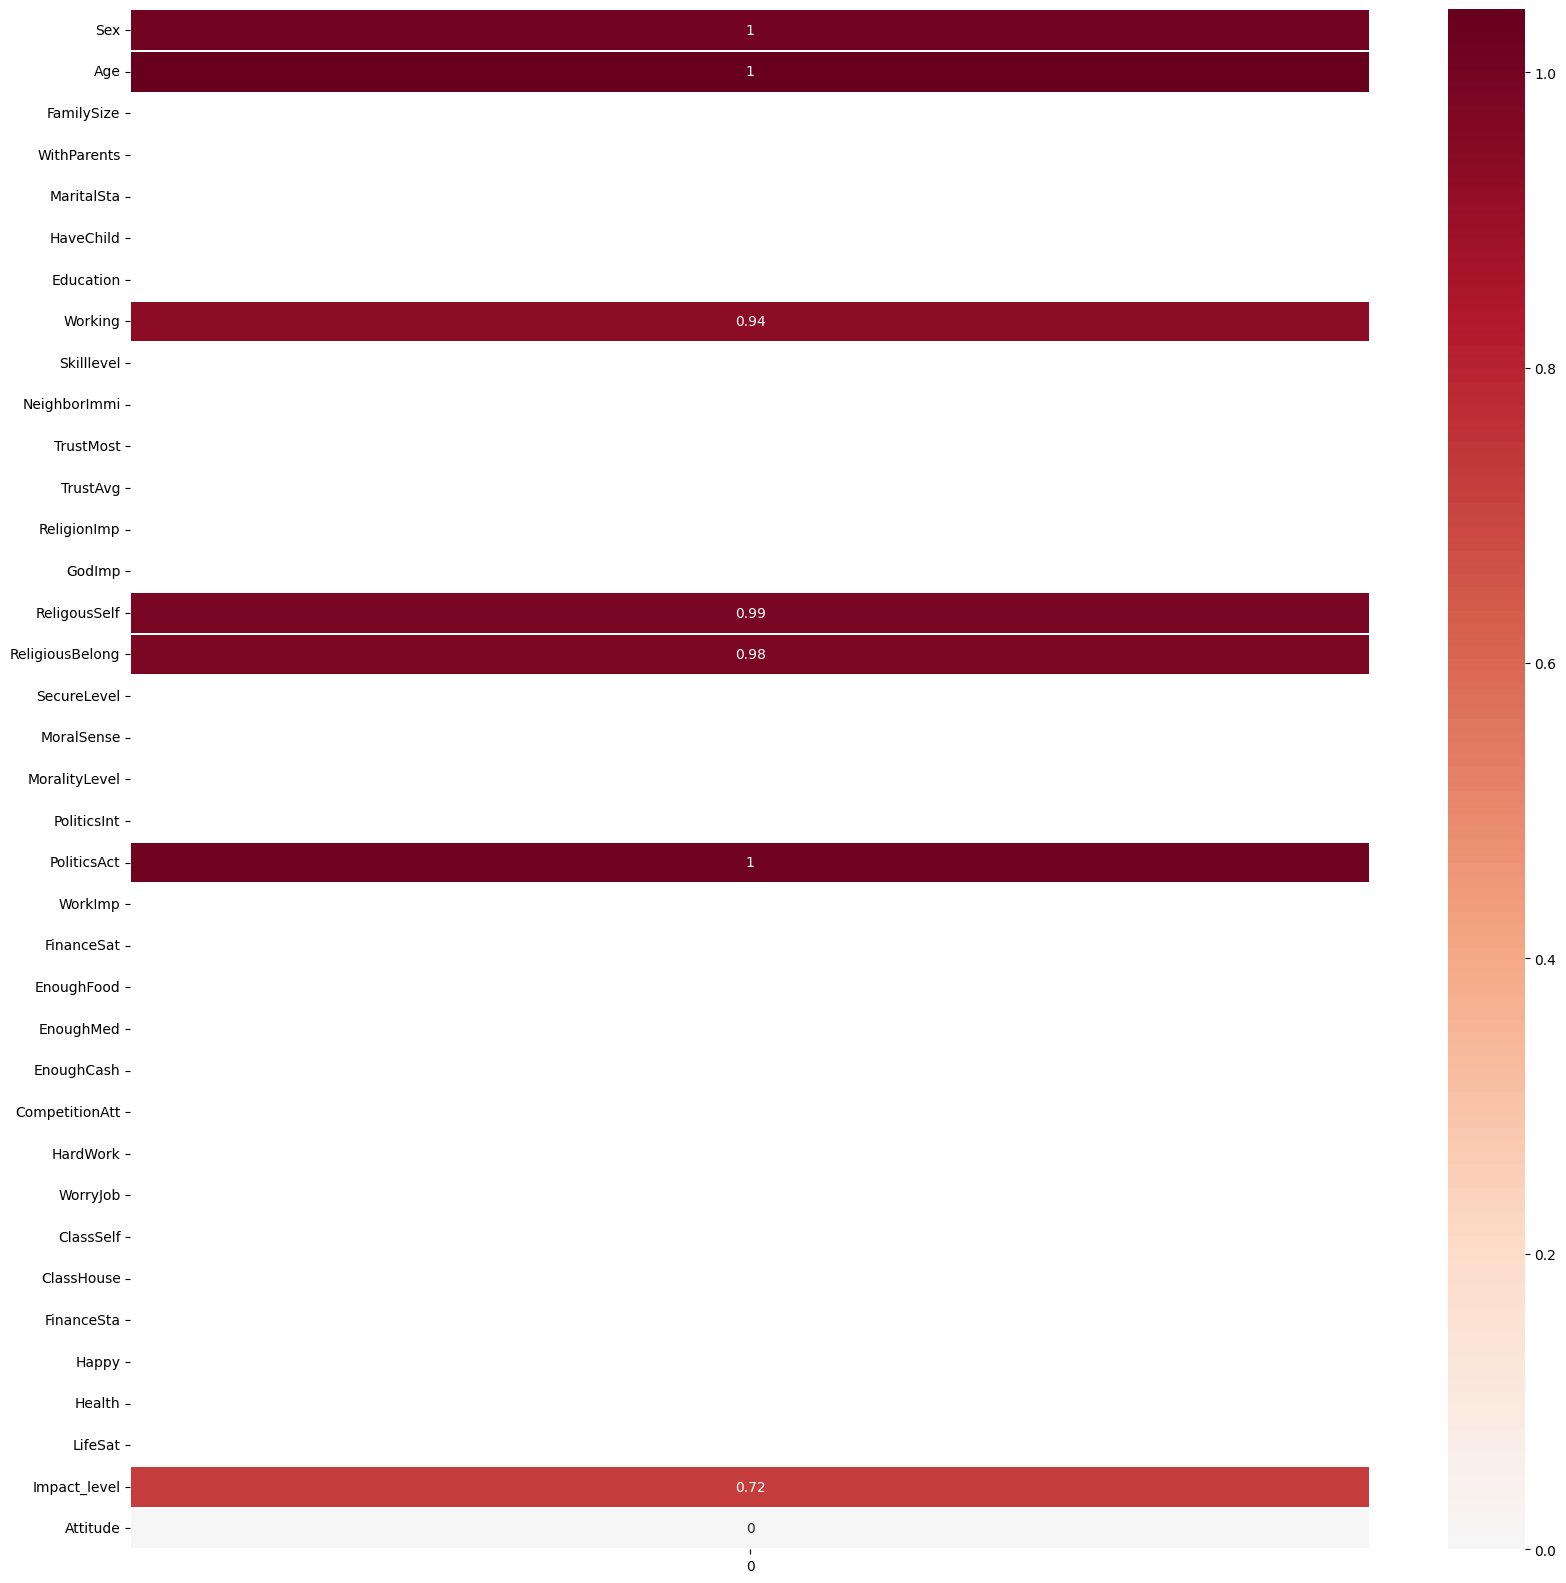

In [98]:
import distance
from scipy.spatial.distance import correlation

# Calculate the distance correlation between the columns of the dataframe
corr = combine.apply(lambda x: correlation(x, combine['Attitude']))

# Convert the "corr" Series object to a DataFrame object and reset the index
corr_df = corr.to_frame()

# Visualize the correlation matrix as a heatmap
sns.set_context({"figure.figsize":(20,20)})
sns.heatmap(data=corr_df,annot=True,linewidths=0.3,cmap="RdBu_r",center=0)

# Show the plot
plt.show()

In [99]:
from sklearn.impute import KNNImputer
# Convert the dataframe to a NumPy array
X = combine.values

# Create a KNNImputer object
imputer = KNNImputer(n_neighbors=40)

# Use the fit_transform() method to fill the missing values
X_filled = imputer.fit_transform(X)

# Convert the filled array back to a dataframe
df_filled = pd.DataFrame(X_filled, columns=combine.columns)

# Print the filled dataframe
df_filled

,Sex,Age,FamilySize,WithParents,MaritalSta,HaveChild,Education,Working,Skilllevel,NeighborImmi,TrustMost,TrustAvg,ReligionImp,GodImp,ReligousSelf,ReligiousBelong,SecureLevel,MoralSense,MoralityLevel,PoliticsInt,PoliticsAct,WorkImp,FinanceSat,EnoughFood,EnoughMed,EnoughCash,CompetitionAtt,HardWork,WorryJob,ClassSelf,ClassHouse,FinanceSta,Happy,Health,LifeSat,Impact_level,Attitude
0,2.0,38.0,3.0,1.0,1.0,1.0,2.95,0.0,5.00,1.0,1.0,8.0,3.0,2.0,1.0,0.0,1.0,7.0,2.0,2.0,7.0,2.0,5.0,4.0,4.0,4.0,1.0,1.0,2.0,3.00,4.0,4.000000,2.0,2.0,5.0,3.0,0.0
1,2.0,52.0,6.0,1.0,1.0,2.0,1.00,1.0,2.00,1.0,1.0,9.0,3.0,1.0,2.0,0.0,1.0,1.0,1.0,4.0,9.0,1.0,10.0,4.0,4.0,4.0,1.0,1.0,4.0,3.85,3.0,4.000000,1.0,1.0,10.0,5.0,1.0
2,2.0,69.0,1.0,1.0,5.0,2.0,3.00,0.0,3.60,1.0,1.0,8.0,4.0,1.0,2.0,0.0,2.0,4.0,1.0,3.0,8.0,3.0,10.0,4.0,4.0,4.0,1.0,1.0,4.0,3.00,6.0,4.000000,1.0,1.0,10.0,4.0,0.0
3,1.0,48.0,3.0,1.0,1.0,1.0,2.55,0.0,4.45,1.0,2.0,9.0,3.0,1.0,2.0,0.0,3.0,4.0,2.0,2.0,7.0,1.0,5.0,4.0,3.0,3.0,3.0,2.0,2.0,4.00,5.0,3.333333,2.0,2.0,5.0,5.0,0.0
4,1.0,70.0,5.0,1.0,1.0,1.0,6.00,0.0,9.00,2.0,1.0,9.0,3.0,1.0,2.0,0.0,2.0,1.0,1.0,2.0,7.0,2.0,10.0,4.0,4.0,4.0,1.0,1.0,2.0,3.00,4.0,4.000000,1.0,1.0,10.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984,2.0,46.0,3.0,1.0,3.0,1.0,1.00,0.0,0.00,1.0,2.0,9.0,2.0,10.0,1.0,1.0,2.0,2.0,1.0,2.0,7.0,2.0,3.0,3.0,3.0,3.0,3.0,8.0,2.0,3.00,2.0,3.000000,3.0,2.0,8.0,3.0,1.0
2985,2.0,35.0,4.0,1.0,1.0,2.0,2.00,0.0,5.00,2.0,1.0,8.0,3.0,1.0,2.0,0.0,2.0,5.0,1.0,3.0,8.0,2.0,9.0,4.0,4.0,4.0,5.0,1.0,2.0,4.00,2.0,4.000000,1.0,1.0,9.0,4.0,1.0
2986,1.0,24.0,5.0,2.0,1.0,1.0,3.00,1.0,4.00,2.0,1.0,11.0,4.0,5.0,2.0,0.0,2.0,6.0,1.0,3.0,7.0,2.0,6.0,4.0,4.0,4.0,8.0,7.0,3.0,4.00,6.0,4.000000,1.0,2.0,9.0,4.0,0.0
2987,1.0,46.0,3.0,1.0,1.0,1.0,3.00,1.0,4.00,2.0,1.0,8.0,3.0,3.0,1.0,1.0,2.0,3.0,1.0,2.0,7.0,2.0,5.0,4.0,4.0,4.0,4.0,2.0,3.0,4.00,3.0,4.000000,2.0,2.0,6.0,4.0,0.0


In [100]:
df_filled.isnull().sum()

Sex                0
Age                0
FamilySize         0
WithParents        0
MaritalSta         0
HaveChild          0
Education          0
Working            0
Skilllevel         0
NeighborImmi       0
TrustMost          0
TrustAvg           0
ReligionImp        0
GodImp             0
ReligousSelf       0
ReligiousBelong    0
SecureLevel        0
MoralSense         0
MoralityLevel      0
PoliticsInt        0
PoliticsAct        0
WorkImp            0
FinanceSat         0
EnoughFood         0
EnoughMed          0
EnoughCash         0
CompetitionAtt     0
HardWork           0
WorryJob           0
ClassSelf          0
ClassHouse         0
FinanceSta         0
Happy              0
Health             0
LifeSat            0
Impact_level       0
Attitude           0
dtype: int64

In [101]:
df_filled.describe()

,Sex,Age,FamilySize,WithParents,MaritalSta,HaveChild,Education,Working,Skilllevel,NeighborImmi,TrustMost,TrustAvg,ReligionImp,GodImp,ReligousSelf,ReligiousBelong,SecureLevel,MoralSense,MoralityLevel,PoliticsInt,PoliticsAct,WorkImp,FinanceSat,EnoughFood,EnoughMed,EnoughCash,CompetitionAtt,HardWork,WorryJob,ClassSelf,ClassHouse,FinanceSta,Happy,Health,LifeSat,Impact_level,Attitude
count,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000
mean,1.548344,44.513884,3.497298,1.401087,1.865498,1.402108,2.832795,0.603212,3.981716,1.739721,1.345851,8.141711,3.248168,2.808498,1.842088,0.143192,1.835656,5.191761,2.058063,2.491736,6.790565,1.724172,6.520693,3.888474,3.686492,3.631056,3.393627,3.729659,2.276790,3.704600,4.144220,3.735502,1.849707,2.211358,7.425360,3.524925,0.597859
std,0.497741,14.506942,1.466659,0.682681,1.802323,0.909365,1.899418,0.489313,2.933310,0.434864,0.474051,1.726808,0.783939,2.540503,0.364720,0.350327,0.573365,2.576246,1.216570,0.830403,1.784292,0.753039,2.274976,0.388029,0.667642,0.746315,2.197685,2.728024,0.960173,0.797417,1.832569,0.469046,0.629893,0.927380,2.035258,0.801060,0.490412
min,1.000000,18.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,32.000000,2.000000,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,7.000000,3.000000,1.000000,2.000000,0.000000,1.000000,3.000000,1.000000,2.000000,5.000000,1.000000,5.000000,4.000000,4.000000,4.000000,2.000000,1.000000,2.000000,3.000000,3.000000,3.666667,1.000000,1.000000,6.000000,3.000000,0.000000
50%,2.000000,45.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,4.000000,2.000000,1.000000,8.000000,3.000000,1.000000,2.000000,0.000000,2.000000,5.000000,2.000000,2.000000,7.000000,2.000000,7.000000,4.000000,4.000000,4.000000,3.000000,3.000000,2.000000,4.000000,4.000000,4.000000,2.000000,2.000000,8.000000,4.000000,1.000000
75%,2.000000,56.000000,4.000000,2.000000,1.000000,2.000000,3.000000,1.000000,6.000000,2.000000,2.000000,9.000000,4.000000,4.000000,2.000000,0.000000,2.000000,7.000000,3.000000,3.000000,8.000000,2.000000,8.000000,4.000000,4.000000,4.000000,5.000000,5.000000,3.000000,4.000000,5.000000,4.000000,2.000000,3.000000,9.000000,4.000000,1.000000
max,2.000000,70.000000,13.000000,4.000000,6.000000,7.000000,8.000000,1.000000,9.000000,2.000000,2.000000,13.000000,4.000000,10.000000,2.000000,1.000000,4.000000,10.000000,10.000000,4.000000,9.000000,4.000000,10.000000,4.000000,4.000000,4.000000,10.000000,10.000000,4.000000,5.000000,10.000000,4.000000,4.000000,5.000000,10.000000,5.000000,1.000000


# From here we start to train our models 

In [102]:
from sklearn.model_selection import train_test_split
df1 = df_filled
# Extract the feature columns and target columns
X = df1.drop(['Attitude', 'Impact_level'], axis=1)
y_attitude = df1['Attitude']
y_impact = df1['Impact_level']

# Split the data into training and test sets
X_train, X_test, y_attitude_train, y_attitude_test = train_test_split(X, y_attitude, test_size=0.2, random_state=42)
X_train, X_test, y_impact_train, y_impact_test = train_test_split(X, y_impact, test_size=0.2, random_state=42)


In [103]:
# Import the necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

# Fit the model to the training data
knn.fit(X_train, y_attitude_train)

# Create a GaussianNB classifier
gnb = GaussianNB()

# Fit the model to the training data
gnb.fit(X_train, y_attitude_train)

# Create a logistic regression model
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train, y_attitude_train)

# Create an SVC model
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_attitude_train)

# Create a decision tree classifier
dt = DecisionTreeClassifier()

# Fit the model to the training data
dt.fit(X_train, y_attitude_train)

# Create a random forest classifier
rf = RandomForestClassifier()

# Fit the model to the training data
rf.fit(X_train, y_attitude_train)

# Create an MLP classifier
mlp = MLPClassifier()

# Fit the model to the training data
mlp.fit(X_train, y_attitude_train)



/Users/zuoxu/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MLPClassifier()

In [104]:
# Import the necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Create a list of model names
model_names = ['KNN', 'GaussianNB', 'Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest', 'MLP']

# Create a list of models
models = [knn, gnb, log_reg, svc, dt, rf, mlp]

# Create an empty list to store the evaluation scores
scores = []

# Iterate over the models
for model, name in zip(models, model_names):
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate the evaluation scores
    accuracy = accuracy_score(y_attitude_test, y_pred)
    f1 = f1_score(y_attitude_test, y_pred)
    recall = recall_score(y_attitude_test, y_pred)
    precision = precision_score(y_attitude_test, y_pred)
    roc_auc = roc_auc_score(y_attitude_test, y_pred)
    cv_scores = cross_val_score(model, X, y_attitude, cv=5)
    
   # Store the evaluation scores in the list
    scores.append({'Model': name, 'Metric': 'Accuracy', 'Score': accuracy})
    scores.append({'Model': name, 'Metric': 'F1 Score', 'Score': f1})
    scores.append({'Model': name, 'Metric': 'Recall', 'Score': recall})
    scores.append({'Model': name, 'Metric': 'Precision', 'Score': precision})
    scores.append({'Model': name, 'Metric': 'ROC AUC', 'Score': roc_auc})


# Convert the list to a Pandas dataframe
df_scores = pd.DataFrame(scores)




/Users/zuoxu/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zuoxu/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [105]:
# Import the necessary modules
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


# Build the ANN model for predicting Attitude
model_attitude = Sequential()
model_attitude.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model_attitude.add(Dense(1, activation='sigmoid'))


# Compile the model
model_attitude.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])

# Train the model
model_attitude.fit(X_train, y_attitude_train, epochs=10, batch_size=32)


# Evaluate the model on the test data
loss, accuracy, f1_score, precision, recall = model_attitude.evaluate(X_test, y_attitude_test)




2022-12-22 18:52:04.377810: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10


2022-12-22 18:52:10.760416: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


75/75 [==============================] - 1s 2ms/step - loss: 2.4163 - accuracy: 0.5031 - f1_m: 0.4392 - precision_m: 0.4541 - recall_m: 0.4830       
Epoch 2/10
75/75 [==============================] - 0s 1ms/step - loss: 0.7936 - accuracy: 0.5688 - f1_m: 0.6603 - precision_m: 0.6223 - recall_m: 0.7172
Epoch 3/10
75/75 [==============================] - 0s 1ms/step - loss: 0.7387 - accuracy: 0.5717 - f1_m: 0.6714 - precision_m: 0.6228 - recall_m: 0.7444
Epoch 4/10
75/75 [==============================] - 0s 1ms/step - loss: 0.7124 - accuracy: 0.5822 - f1_m: 0.6795 - precision_m: 0.6298 - recall_m: 0.7547
Epoch 5/10
75/75 [==============================] - 0s 1ms/step - loss: 0.6991 - accuracy: 0.5839 - f1_m: 0.6890 - precision_m: 0.6257 - recall_m: 0.7841
Epoch 6/10
75/75 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5889 - f1_m: 0.6858 - precision_m: 0.6272 - recall_m: 0.7834
Epoch 7/10
75/75 [==============================] - 0s 1ms/step - loss: 0.6810 -

In [106]:
# Create a list of model names
model_names = ['ANN']

# Create an empty list to store the evaluation scores
scores = []

# Iterate over the models
for model, name in zip(models, model_names):
    # Evaluate the model on the test data
    loss, accuracy, f1_score, precision, recall = model_attitude.evaluate(X_test, y_attitude_test)
    # Store the evaluation scores in the list 
    scores.append({'Model': name, 'Metric': 'Accuracy', 'Score': accuracy})
    scores.append({'Model': name, 'Metric': 'F1 Score', 'Score': f1})
    scores.append({'Model': name, 'Metric': 'Recall', 'Score': recall})
    scores.append({'Model': name, 'Metric': 'Precision', 'Score': precision})
    # Convert the list to a Pandas dataframe
df_scores2 = pd.DataFrame(scores)

19/19 [==============================] - 0s 1ms/step - loss: 0.6881 - accuracy: 0.5669 - f1_m: 0.6852 - precision_m: 0.5914 - recall_m: 0.8303


In [107]:
df_scores = pd.concat([df_scores, df_scores2])

posx and posy should be finite values
posx and posy should be finite values


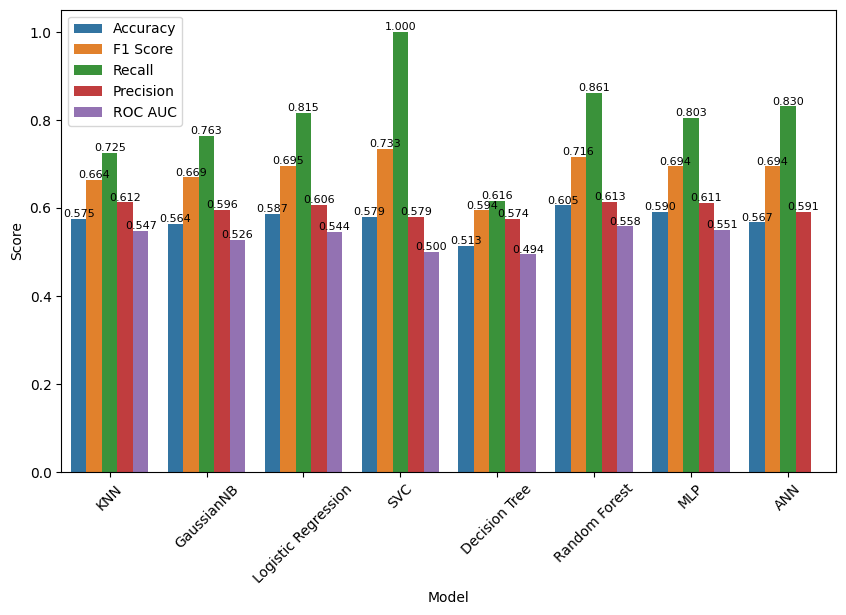

In [111]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot of the evaluation scores
ax = sns.barplot(x='Model', y='Score', hue='Metric', data=df_scores)

# Set the x-axis labels
plt.xticks(rotation=45)

# Add text labels to the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%.3f' % p.get_height(), 
            fontsize=8, color='black', ha='center', va='bottom')
# Add a legend
plt.legend(loc='upper left')

# Show the plot
plt.show()


## Here we can see that all models don't perform really well while they all have Accuracy and Precision around 0.6. Besides, recall of SVC is 1 which can be the problem of the threshold of it. And overall, we can see that the classifiers are biased towards predicting a particular class. But Random Forest still performs the best.

In [112]:
# Get the feature importance scores
importances = rf.feature_importances_

# Print the feature importance scores
print(importances)

[0.01484056 0.06660003 0.04160789 0.01787906 0.0130641  0.02575221
 0.0322332  0.01378454 0.05008267 0.01674115 0.01520567 0.04480229
 0.02296561 0.03547715 0.00853984 0.0073295  0.02073776 0.05508647
 0.03068063 0.0276518  0.04148762 0.02372066 0.04335616 0.01257084
 0.01230105 0.01331826 0.04237472 0.04365588 0.0296006  0.02463863
 0.0405733  0.0232831  0.01953638 0.02711941 0.04140124]


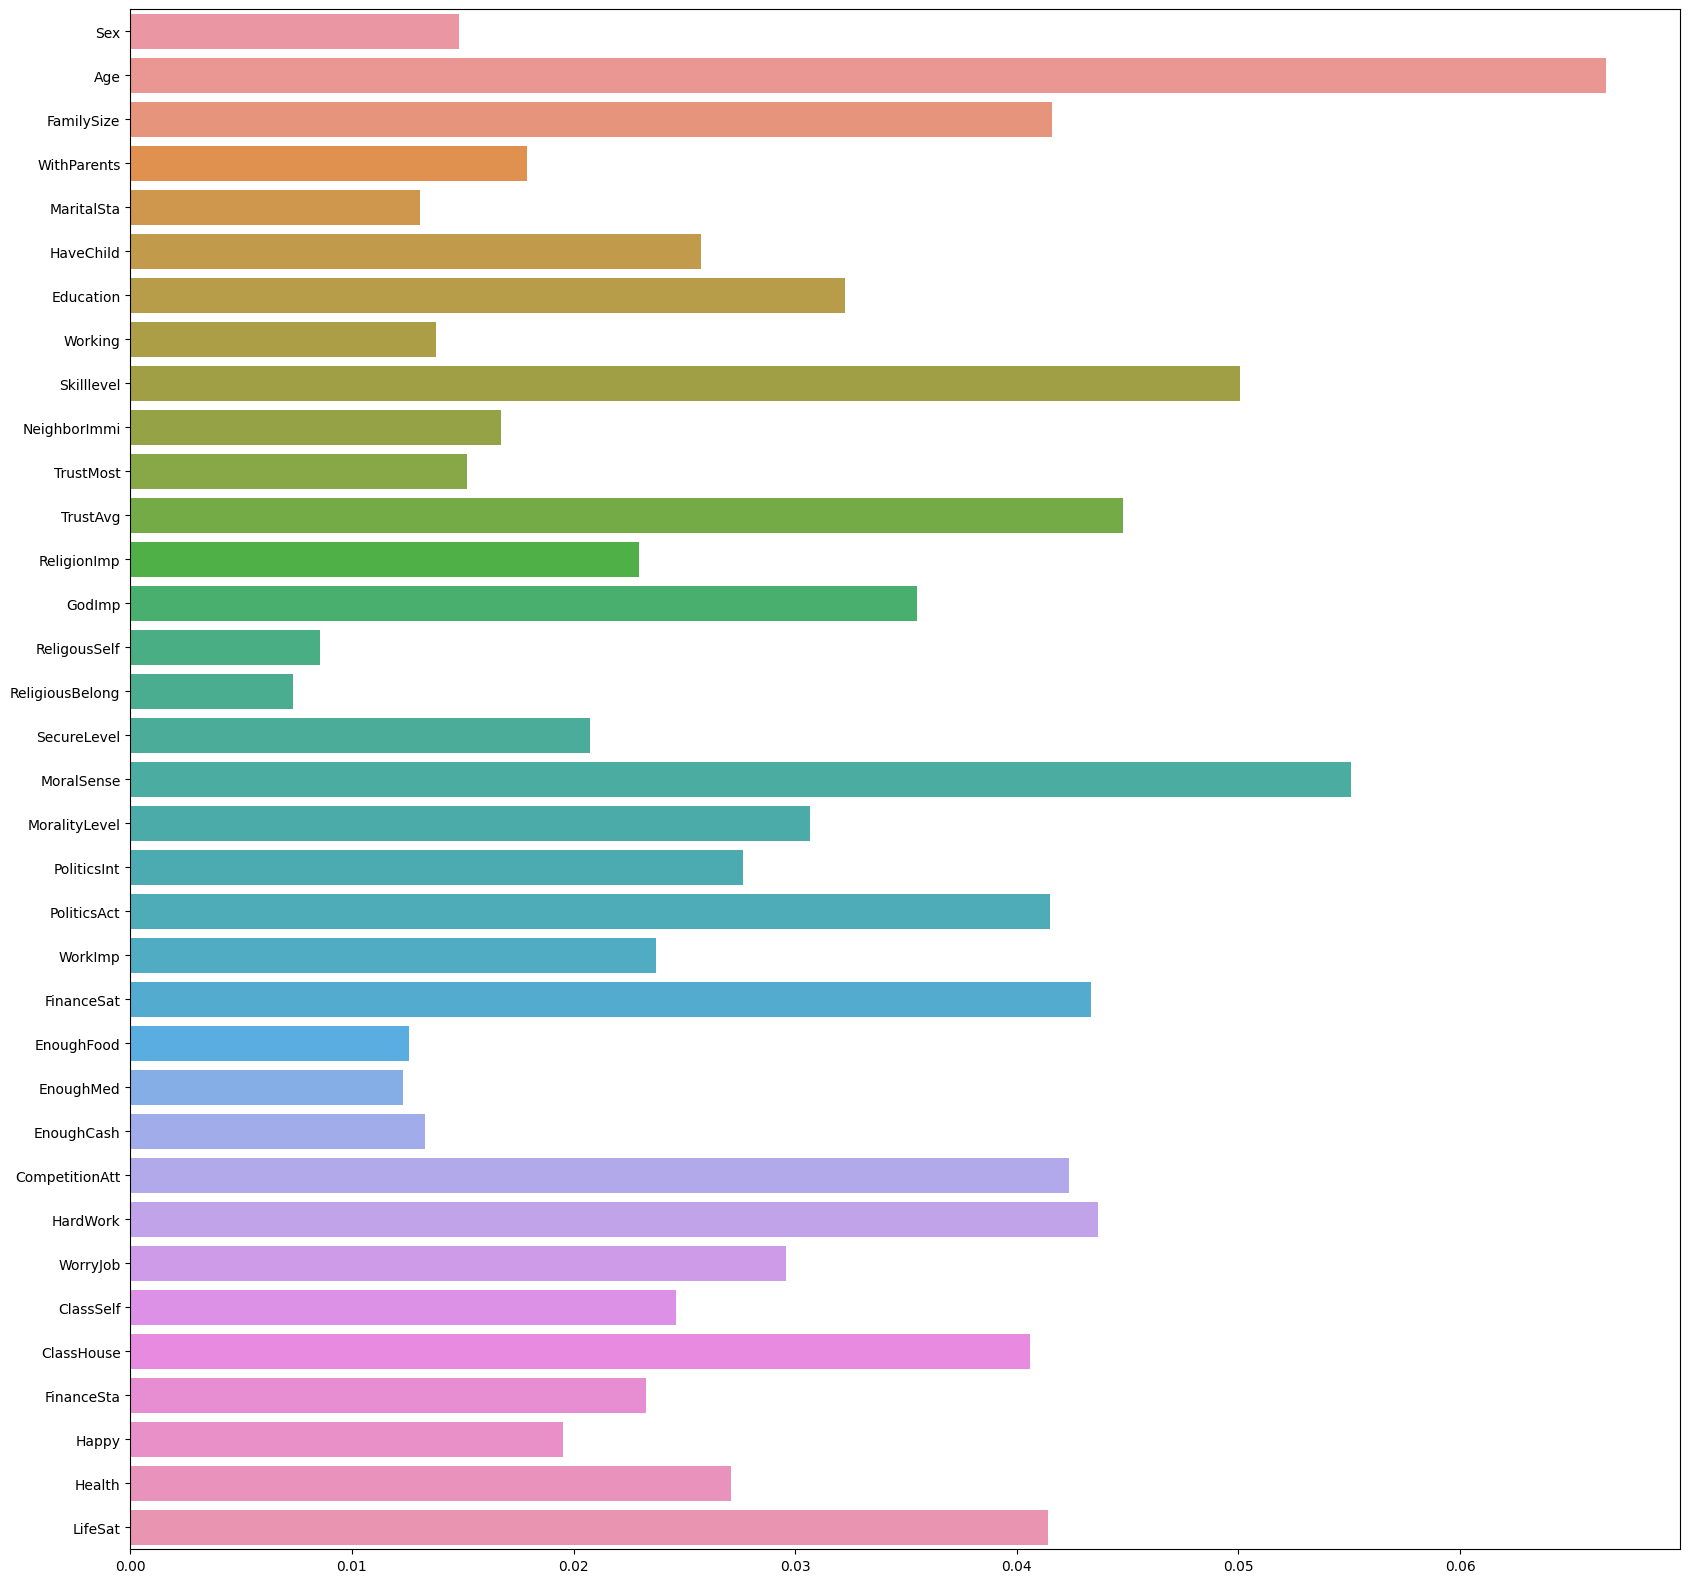

In [113]:
# Get the feature names
feature_names = list(X.columns)

# Create a bar plot of the feature importance scores
sns.barplot(x=importances, y=feature_names)

# Show the plot
plt.show()

## Compare to the results of USA, we can see that Age always matters. In China, Moral Sense and People's Skill Level also matter while in USA, Trust Level of Unknown people and Political Activity are more important .

## Here we start to predict 'Impact_level'

In [114]:
# Import the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# Define the models
linear_reg = LinearRegression()
svm_reg = SVR()
tree_reg = DecisionTreeRegressor(random_state=42)
forest_reg = RandomForestRegressor(random_state=42)
mlp_reg = MLPRegressor(random_state=42)

# Fit the models to the training data
linear_reg.fit(X_train, y_impact_train)
svm_reg.fit(X_train, y_impact_train)
tree_reg.fit(X_train, y_impact_train)
forest_reg.fit(X_train, y_impact_train)
mlp_reg.fit(X_train, y_impact_train)




MLPRegressor(random_state=42)

In [115]:
# Create a list of model names
model_names = ['LinearRegression', 'SVR', 'DecisionTreeRegressor', 'RandomForestRegressor', 'MLPRegressor']

# Create a list of models
models = [linear_reg, svm_reg, tree_reg, forest_reg, mlp_reg]

# Create an empty list to store the evaluation scores
scores = []

# Iterate over the models
for model, name in zip(models, model_names):
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate the evaluation scores
    mae = mean_absolute_error(y_impact_test, y_pred)
    rmse = mean_squared_error(y_impact_test, y_pred, squared=False)
    r2 = r2_score(y_impact_test, y_pred)
    cv_scores = cross_val_score(model, X, y_impact, cv=5)
    
   # Store the evaluation scores in the list
    scores.append({'Model': name, 'Metric': 'MAE', 'Score': mae})
    scores.append({'Model': name, 'Metric': 'RMSE', 'Score': rmse})
    scores.append({'Model': name, 'Metric': 'R2 Score', 'Score': r2})

# Convert the list to a Pandas dataframe
df_scores = pd.DataFrame(scores)




/Users/zuoxu/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/zuoxu/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [116]:
# Print the evaluation scores
print(df_scores)

                    Model    Metric     Score
0        LinearRegression       MAE  0.638976
1        LinearRegression      RMSE  0.766181
2        LinearRegression  R2 Score  0.027295
3                     SVR       MAE  0.643780
4                     SVR      RMSE  0.796421
5                     SVR  R2 Score -0.051003
6   DecisionTreeRegressor       MAE  0.801003
7   DecisionTreeRegressor      RMSE  1.116163
8   DecisionTreeRegressor  R2 Score -1.064305
9   RandomForestRegressor       MAE  0.634983
10  RandomForestRegressor      RMSE  0.769990
11  RandomForestRegressor  R2 Score  0.017598
12           MLPRegressor       MAE  0.650055
13           MLPRegressor      RMSE  0.801411
14           MLPRegressor  R2 Score -0.064216


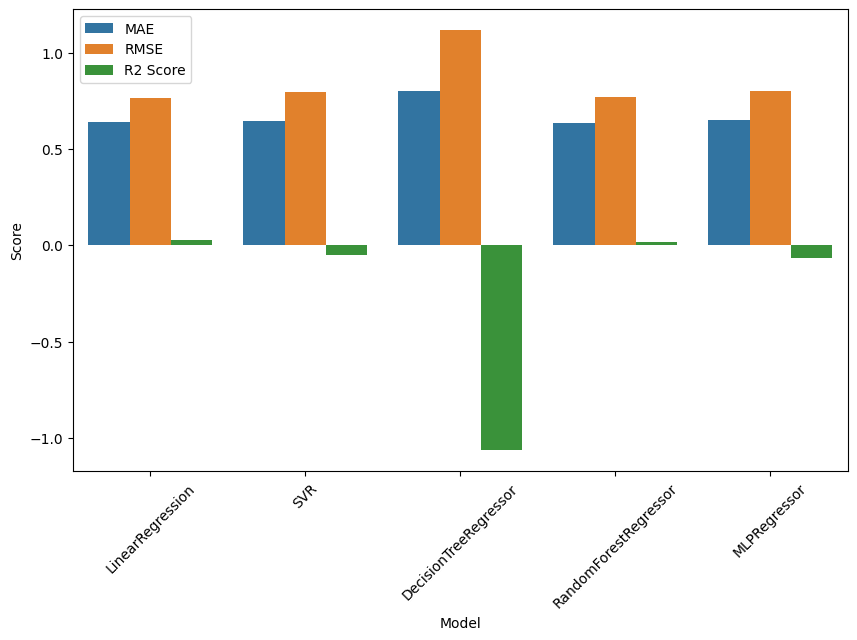

In [117]:
import seaborn as sns
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot of the evaluation scores
sns.barplot(x='Model', y='Score', hue='Metric', data=df_scores)

# Set the x-axis labels
plt.xticks(rotation=45)

# Add a legend
plt.legend(loc='upper left')

# Show the plot
plt.show()


In [118]:
model = Sequential()
model.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, y_impact_train, epochs=10, batch_size=32)

loss = model.evaluate(X_test, y_impact_test, return_dict=True)


from sklearn.metrics import mean_squared_error,r2_score

from math import sqrt

# Make predictions on the test data
y_impact_pred = model.predict(X_test)

# Calculate the MSE
mse = mean_squared_error(y_impact_test, y_impact_pred)

# Calculate the RMSE
rmse = sqrt(mse)

# Calculate the MSE
r2 = r2_score(y_impact_test, y_impact_pred)

print('MSE:', mse)
print('RMSE:', rmse)
print('R2:', r2)


Epoch 1/10
75/75 [==============================] - 1s 1ms/step - loss: 18.7511
Epoch 2/10
75/75 [==============================] - 0s 1ms/step - loss: 3.8635
Epoch 3/10
75/75 [==============================] - 0s 1ms/step - loss: 1.8876
Epoch 4/10
75/75 [==============================] - 0s 1ms/step - loss: 1.2243
Epoch 5/10
75/75 [==============================] - 0s 1ms/step - loss: 0.9819
Epoch 6/10
75/75 [==============================] - 0s 1ms/step - loss: 0.8599
Epoch 7/10
75/75 [==============================] - 0s 2ms/step - loss: 0.7945
Epoch 8/10
75/75 [==============================] - 0s 1ms/step - loss: 0.7683
Epoch 9/10
75/75 [==============================] - 0s 1ms/step - loss: 0.7489
Epoch 10/10
19/19 [==============================] - 0s 960us/step
MSE: 0.7029898813427758
RMSE: 0.83844491849064
R2: -0.1648440964882214


## Compare to case in USA, here is kinda clear that there's no relation between features and target. Or maybe due to the lack of data, or the reliability of data, linear relation is not clear at all.
### However all models don't differ that much here

# Here we do PCA processing instead our knowledge-baseed processing
# We will have different dataset without labels. 
# We add this to check if there is anything wrong with the feature engineering.

In [119]:
df_cn

,version,doi,A_WAVE,A_YEAR,A_STUDY,B_COUNTRY,B_COUNTRY_ALPHA,C_COW_NUM,C_COW_ALPHA,D_INTERVIEW,J_INTDATE,FW_START,FW_END,K_TIME_START,K_TIME_END,K_DURATION,Q_MODE,N_REGION_ISO,N_REGION_WVS,N_TOWN,G_TOWNSIZE,G_TOWNSIZE2,H_SETTLEMENT,H_URBRURAL,I_PSU,O1_LONGITUDE,O2_LATITUDE,L_INTERVIEWER_NUMBER,S_INTLANGUAGE,LNGE_ISO,E_RESPINT,F_INTPRIVACY,E1_LITERACY,W_WEIGHT,S018,PWGHT,S025,S007,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q33_3,Q34,Q34_3,Q35,Q35_3,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62,Q63,Q64,Q65,Q66,Q67,Q68,Q69,Q70,Q71,Q72,Q73,Q74,Q75,Q76,Q77,Q78,Q79,Q80,Q81,Q82,Q82_AFRICANUNION,Q82_APEC,Q82_ARABLEAGUE,Q82_ASEAN,Q82_CIS,Q82_ECO,Q82_EU,Q82_GULFCOOP,Q82_ISLCOOP,Q82_MERCOSUR,Q82_NAFTA,Q82_OAS,Q82_SAARC,Q82_SCO,Q82_TLC,Q82_UNDP,Q83,Q84,Q85,Q86,Q87,Q88,Q89,Q90,Q91,Q92,Q93,Q94,Q95,Q96,Q97,Q98,Q99,Q100,Q101,Q102,Q103,Q104,Q105,Q106,Q107,Q108,Q109,Q110,Q111,Q112,Q113,Q114,Q115,Q116,Q117,Q118,Q119,Q120,Q121,Q122,Q123,Q124,Q125,Q126,Q127,Q128,Q129,Q130,Q131,Q132,Q133,Q134,Q135,Q136,Q137,Q138,Q139,Q140,Q141,Q142,Q143,Q144,Q145,Q146,Q147,Q148,Q149,Q150,Q151,Q152,Q153,Q154,Q155,Q156,Q157,Q158,Q159,Q160,Q161,Q162,Q163,Q164,Q165,Q166,Q167,Q168,Q169,Q170,Q171,Q172,Q173,Q174,Q175,Q176,Q177,Q178,Q179,Q180,Q181,Q182,Q183,Q184,Q185,Q186,Q187,Q188,Q189,Q190,Q191,Q192,Q193,Q194,Q195,Q196,Q197,Q198,Q199,Q200,Q201,Q202,Q203,Q204,Q205,Q206,Q207,Q208,Q209,Q210,Q211,Q212,Q213,Q214,Q215,Q216,Q217,Q218,Q219,Q220,Q221,Q222,Q223,Q223_ABREV,Q223_LOCAL,Q224,Q225,Q226,Q227,Q228,Q229,Q230,Q231,Q232,Q233,Q234,Q234A,Q234B,Q235,Q236,Q237,Q238,Q239,Q240,Q241,Q242,Q243,Q244,Q245,Q246,Q247,Q248,Q249,Q250,Q251,Q252,Q253,Q254,Q255,Q256,Q257,Q258,Q259,Q260,Q261,Q262,X003R,X003R2,Q263,Q264,Q265,Q266,Q267,Q268,Q269,Q270,Q271,Q272,Q273,Q274,Q275,Q275A,Q275R,Q276,Q276A,Q276R,Q277,Q277A,Q277R,Q278,Q278A,Q278R,Q279,Q280,Q281,Q282,Q283,Q284,Q285,Q286,Q287,Q288,Q288R,Q289,Q289CS9,Q290,Y001,Y002,Y003,SACSECVAL,RESEMAVAL,I_AUTHORITY,I_NATIONALISM,I_DEVOUT,DEFIANCE,I_RELIGIMP,I_RELIGBEL,I_RELIGPRAC,DISBELIEF,I_NORM1,I_NORM2,I_NORM3,RELATIVISM,I_TRUSTARMY,I_TRUSTPOLICE,I_TRUSTCOURTS,SCEPTICISM,I_INDEP,I_IMAGIN,I_NONOBED,AUTONOMY,I_WOMJOB,I_WOMPOL,I_WOMEDU,EQUALITY,I_HOMOLIB,I_ABORTLIB,I_DIVORLIB,CHOICE,I_VOICE1,I_VOICE2,I_VOI2_00,VOICE,SECVALWGT,RESEMAVALWGT,NAME,fhregion,polregfh,freestfh,prfhrat,prfhscore,clfhrat,clfhscore,democ,autoc,polity,durable,regtype,ruleoflaw,corrupttransp,electintegr,btiregion,btistatus,btidemstatus,btistate,btipolpart,btiruleoflaw,btistability,btiintegration,btimarket,btigovindex,btigoveperform,btiregime,regionWB,incomeWB,landWB,GDPpercap1,GDPpercap2,giniWB,incrichest10p,popWB1990,popWB2000,popWB2019,lifeexpect,popgrowth,urbanpop,laborforce,deathrate,unemployfem,unemploymale,unemploytotal,accessclfuel,accesselectr,renewelectr,co2emis,co2percap,easeofbusiness,militaryexp,Trade,healthexp,educationexp,medageun,meanschooling,educationHDI,compulseduc,GII,DGI,womenparl,hdi,incomeindexHDI,humanineqiality,lifeexpectHDI,homiciderate,Refugeesorigin,internetusers,mobphone,migrationrate,schoolgpi,femchoutsch,choutsch,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem,v2x_freexp_altinf,v2x_frassoc_thick,v2xel_frefair,v2xcl_rol,v2x_cspart,v2xeg_eqdr,v2excrptps,v2exthftps,v2juaccnt,v2cltrnslw,v2clacjust,v2clsocgrp,v2clacfree,v2clrelig,v2csrlgrep,v2mecenefm,v2mecenefi,v2mebias,v2pepwrses,v2pepwrgen,v2peedueq,v2pehealth,v2peapsecon,v2peasjsoecon,v2clgencl,v2peasjgen,v2peasbgen,v2cafres,v2cafexch,v2x_corr,v2x_gender,v2x_gencl,v2x_genpp,v2x_rule,v2xcl_acjst,ID_GPS,ID_PartyFacts,Partyname,Partyabb,CPARTY,CPARTYABB,Type_Values,Type_Populism,Type_Populist_Values,Type_Partysize_vote,Type_Partysize_seat,GPS_V4_Scale,GPS_V6_Scale,GPS_V8_Scale,GPS_V9,GPS_V10,GPS_V11,GPS_V12,GPS_V13,GPS_V14,GPS_V15,GPS_V16,GPS_V17,WVS_LR_PartyVoter,WVS_LibCon_PartyVoter,WVS_Polmistrust_PartyVoter,WVS_LR_MedianVoter,WVS_LibCon_MedianVot

In [120]:
# We delete cloumns which contain too many missing values
for column in df_cn.columns:
    if df_cn[column].isna().mean() > 0.2:
        # The column has more than 20% missing values
        # Drop the column
        df_cn = df_cn.drop(column, axis=1)


In [121]:
# We delete all non value columns
for column in df_cn.columns:
    if df_cn[column].dtype == object:
        # The column is of data type string
        # Drop the column
        df_cn = df_cn.drop(column, axis=1)

In [122]:
# We delete useless columns
for column in df_cn.columns:
    if df_cn[column].std() < 0.2:
        # The standard deviation is less than 0.2
        # Drop the column
        df_cn = df_cn.drop(column, axis=1)



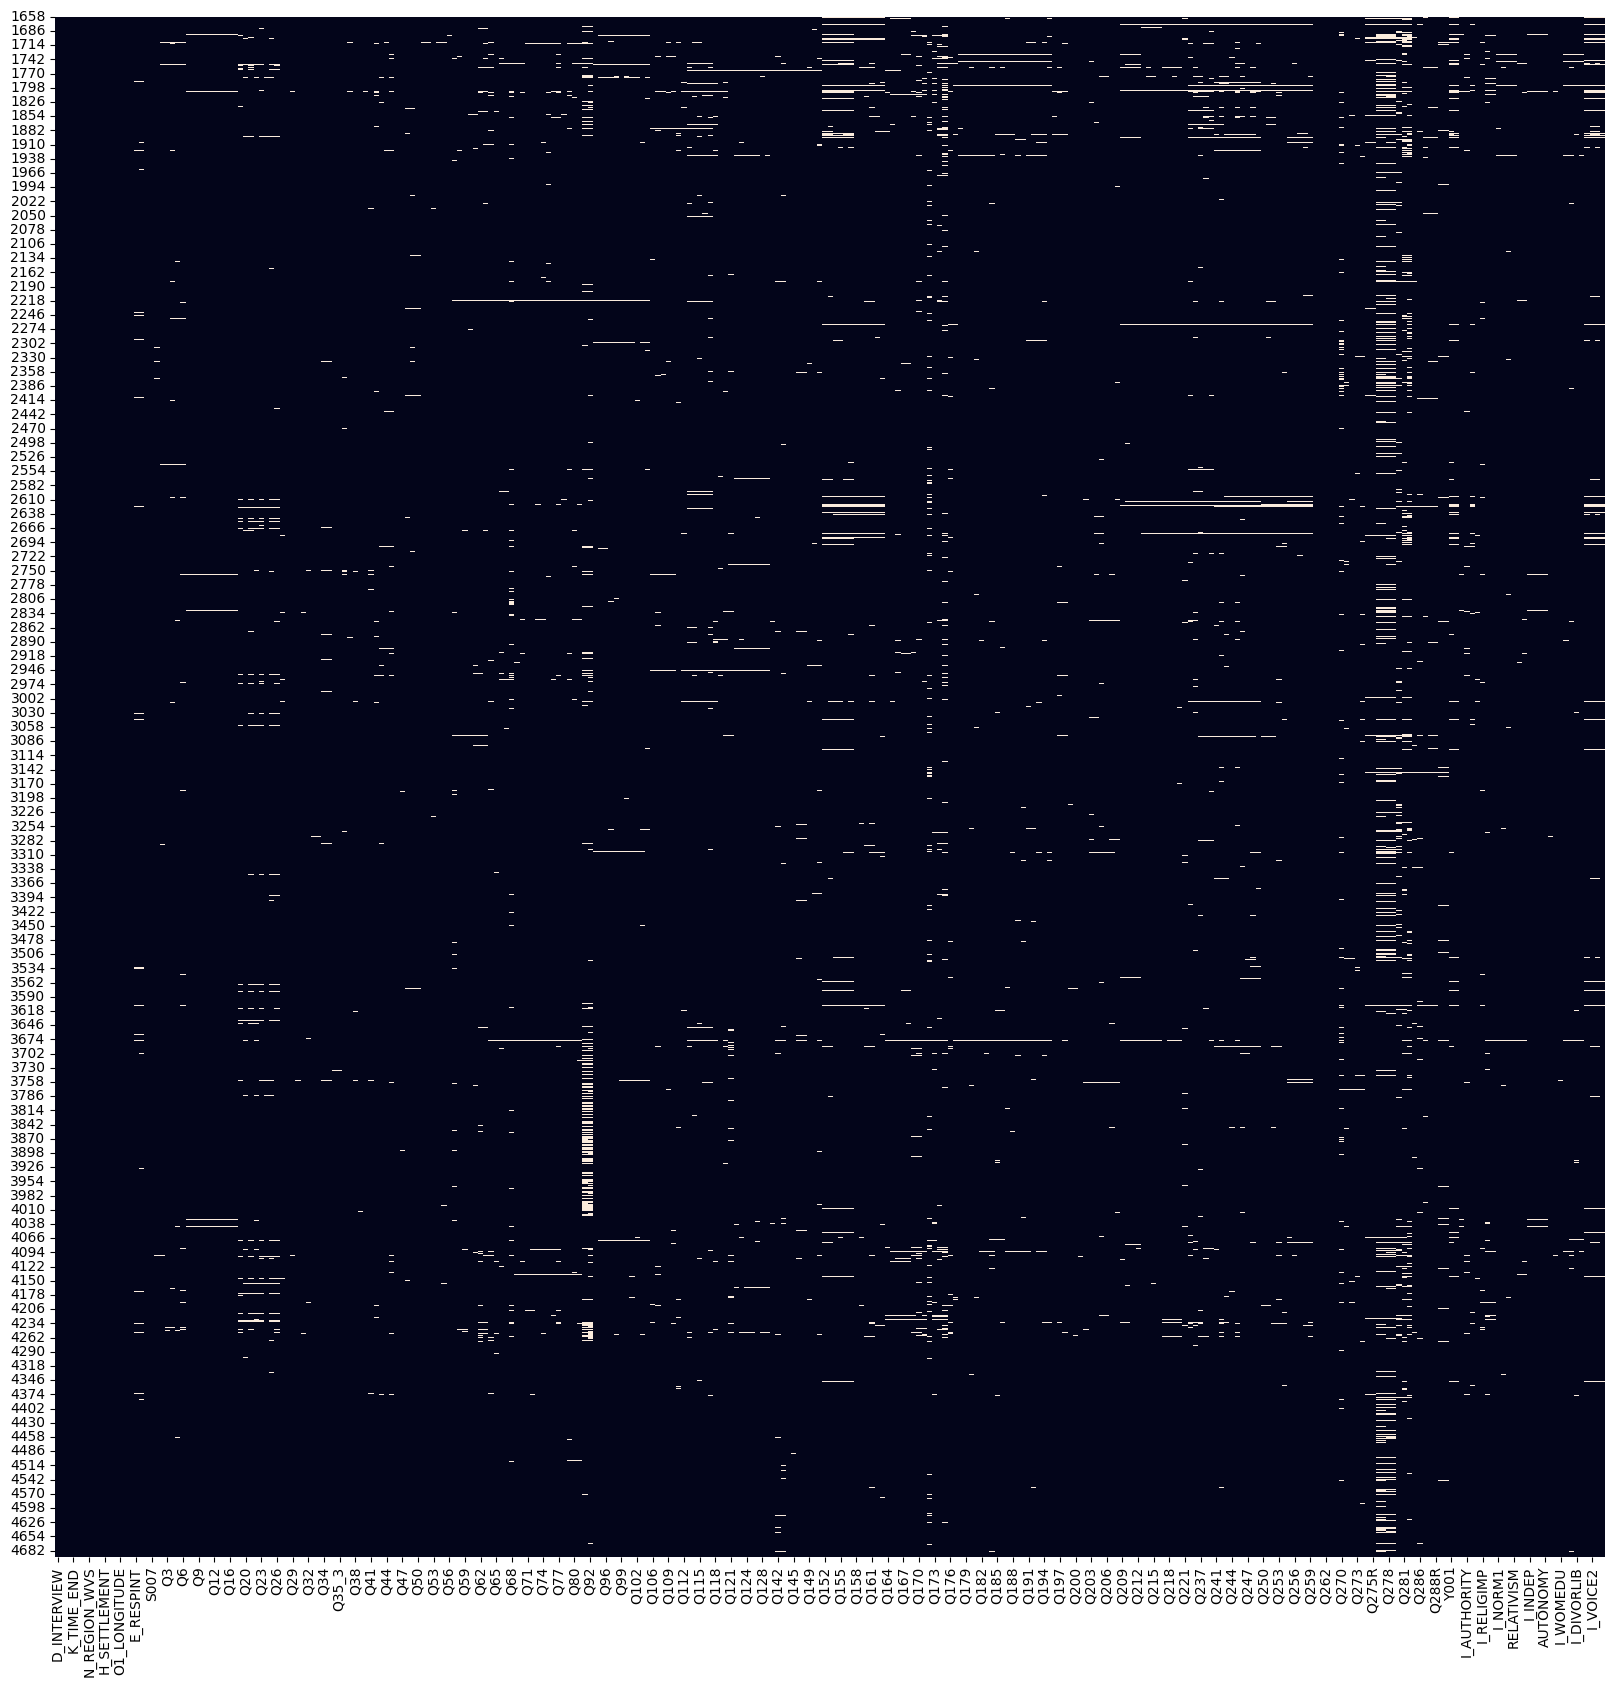

In [123]:
missing_values = df_cn.isnull()

# Create the heatmap
sns.heatmap(missing_values, cbar=False)
plt.show()

In [124]:
# We avoid using KNN again. Just use the mean values to fill missing ones
# Read in the data and compute the average of each column
column_averages = df_cn.mean()

# Fill missing values with the average of each column
df_cn = df_cn.fillna(column_averages)

In [125]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Extract the feature columns and target columns
X = df_cn.drop(['Q121'], axis=1)
y_impact = df_cn['Q121']

# Split the data into training and test sets
X_train, X_test, y_impact_train, y_impact_test = train_test_split(X, y_impact, test_size=0.2, random_state=42)

#Standar data
scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Create a PCA object with 100 components
pca = PCA(n_components=100)

# Fit the PCA object to the data
pca.fit(X_train)


# Transform the data using the fitted PCA object
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


In [126]:
# Define the models
linear_reg = LinearRegression()
svm_reg = SVR()
tree_reg = DecisionTreeRegressor(random_state=42)
forest_reg = RandomForestRegressor(random_state=42)
mlp_reg = MLPRegressor(random_state=42)

# Fit the models to the training data
linear_reg.fit(X_train, y_impact_train)
svm_reg.fit(X_train, y_impact_train)
tree_reg.fit(X_train, y_impact_train)
forest_reg.fit(X_train, y_impact_train)
mlp_reg.fit(X_train, y_impact_train)

MLPRegressor(random_state=42)

In [127]:
# Create a list of model names
model_names = ['LinearRegression', 'SVR', 'DecisionTreeRegressor', 'RandomForestRegressor', 'MLPRegressor']

# Create a list of models
models = [linear_reg, svm_reg, tree_reg, forest_reg, mlp_reg]

# Create an empty list to store the evaluation scores
scores = []

# Iterate over the models
for model, name in zip(models, model_names):
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate the evaluation scores
    mae = mean_absolute_error(y_impact_test, y_pred)
    rmse = mean_squared_error(y_impact_test, y_pred, squared=False)
    r2 = r2_score(y_impact_test, y_pred)
    cv_scores = cross_val_score(model, X, y_impact, cv=5)
    
   # Store the evaluation scores in the list
    scores.append({'Model': name, 'Metric': 'MAE', 'Score': mae})
    scores.append({'Model': name, 'Metric': 'RMSE', 'Score': rmse})
    scores.append({'Model': name, 'Metric': 'R2 Score', 'Score': r2})

# Convert the list to a Pandas dataframe
df_scores = pd.DataFrame(scores)




/Users/zuoxu/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/zuoxu/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/zuoxu/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/zuoxu/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/zuoxu/Lib

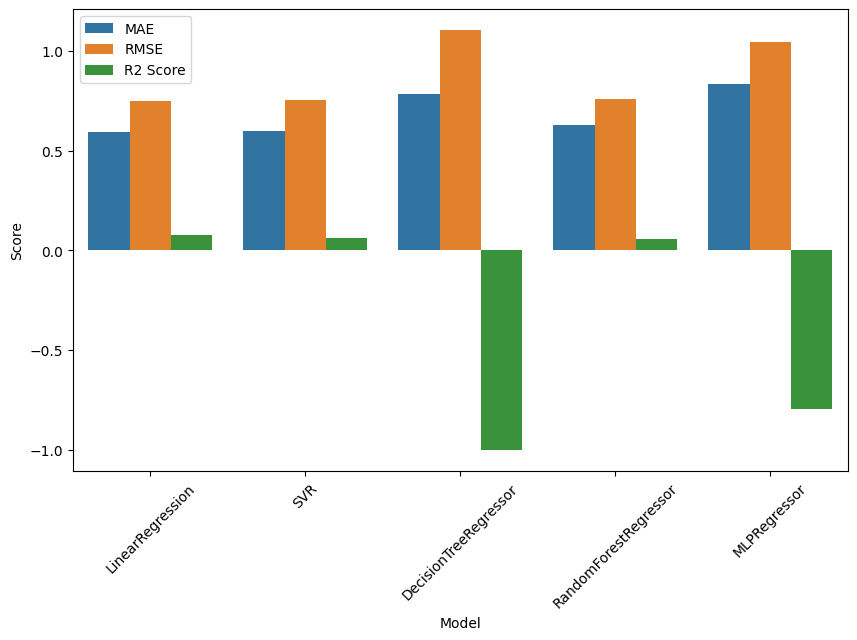

In [128]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot of the evaluation scores
sns.barplot(x='Model', y='Score', hue='Metric', data=df_scores)

# Set the x-axis labels
plt.xticks(rotation=45)

# Add a legend
plt.legend(loc='upper left')

# Show the plot
plt.show()


## From the figure we can see,it improved a little but sicne we add more features here, it's not surprising.  There might be really no linear relation between features and traget. Or it may be caused just because the data we choose is not appropriate for it.